# **Spare Parts Inventory Forecasting**

# **Business Case:**

The  business case  is on the inventory management. Keeping Inventory of spare in various service
centre to the market demand is always a challenge as most service centres spends significant amount in
spare parts inventory costs. In spite of this, availability of spare parts is been one of the problem areas.

### **PROJECT GOAL:**
1. Create Predictive model for inventory forecasting so that service centre achieve JIT
standards.

# Feature Details:

RangeIndex: 28484 entries, 0 to 28483

Data columns (total 7 columns):

Invoice Date 28482 non-null datetime64[ns]

Job Card Date 28482 non-null datetime64[ns]

Business Partner Name 28482 non-null object

Vehicle No. 28484 non-null object

Vehicle Model 28482 non-null object

Current KM Reading 28482 non-null float64

INVOICE LINE TEXT 28449 non-null object


### Data :
Port No 18.136.157.135

DB Name: project_service_data

Table Name: service_data

Domain Name: projects.datamites.com

Username : dm_usdata_sql

Password: 37z<49REb&mKnl4AV!vJ

# **Domain Analysis**

### Invoice date 
An invoice is a time-stamped commercial document that itemizes and records a transaction between a buyer and a seller. 
If goods or services were purchased on credit, the invoice usually specifies the terms of the deal and provides information on the available methods of payment.

In Automobile industry is generated at the time of delivery of items or after the service is completed
Invoice created date : Invoice created date is nothing but the date on which you have created the invoice.




### Job Card date 
Job Card date is when the Consumer raise his request for the service with the service partner by specifying the service/Job required to perform by service provider
This date is tracked to keep inventory in place for the neseccary service product in the service station 
Also it helps track the service TAT adherance and Avg service time for each job card can be calcualated 


#### business_partner_name: 
Name of the Business Partner.

### vehicle_no:
Vechicle Number of a Bike.

### vehicle_model:
Model Name of the Vehicle

### current_km_reading:
Number of K.M., Bike travelled at current movement.

### invoice_line_text:
Name of the inventory or Spare part required for the Business Partner.

# **Installing the libraries**

In [ ]:
!pip install sqlalchemy 
!pip install pymysql

     |████████████████████████████████| 43 kB 2.1 MB/s 


# **Importing the libraries**

In [ ]:
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine
import pandas as pd
import sys
import datetime
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

## **conecting to the SQL Server and collecting the data from the service_data database**

In [ ]:
db_host = '18.136.157.135' # port:  3306
username = 'dm_usdata_sql'
user_pass = '37z<49REb&mKnl4AV!vJ'
db_name = 'project_service_data'

conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
conn.table_names()

['service_data']

In [ ]:
'mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name

'mysql+pymysql://dm_usdata_sql:37z<49REb&mKnl4AV!vJ@18.136.157.135/project_service_data'

## Extracting the data from serive_data

In [ ]:
query = "select * from service_data" # SQL statement
orders = pd.read_sql(query,conn)

### **converting data into csv format**

In [ ]:
orders.to_csv('test1.csv')

# reading the data from test.csv file

In [ ]:
import pandas as pd
data=pd.read_csv('test1.csv',index_col=None,date_parser=True)
data

,Unnamed: 0,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL
...,...,...,...,...,...,...,...,...
28477,28477,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,28478,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,28479,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,28480,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL


In [ ]:
data.drop('Unnamed: 0', inplace=True, axis=1)

# **Basic Checks**

### **Shape of the data**

In [ ]:
data.shape

(28482, 7)

### **head and tail of the data**

In [ ]:
data.head(5)

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [ ]:
data.tail(5)

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
28477,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL
28481,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,AIR FILTER


### **Basic information of the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice_date           28482 non-null  object
 1   job_card_date          28482 non-null  object
 2   business_partner_name  28482 non-null  object
 3   vehicle_no             28482 non-null  object
 4   vehicle_model          28482 non-null  object
 5   current_km_reading     28482 non-null  int64 
 6   invoice_line_text      28448 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


#### **Length of the Unique values of invoice_date**

In [ ]:
len(data.invoice_date.unique())

555

#### **Length of the Unique values of job_card_date**

In [ ]:
len(data.job_card_date.unique())

553

#### **Length of the Unique values of invoice_line_text**

In [ ]:
len(data.invoice_line_text.unique())

503

In [ ]:
data.invoice_line_text.value_counts().head(50)

ENGINE OIL             3802
CHAIN LUBRICATION      3441
GENERAL SERVICE        2142
AIR FILTER             1715
3M OIL                 1628
CONSUMABLES            1595
POLISH                 1245
DISC OIL                991
BRAKE SHOE              965
OIL FILTER              821
DISC PAD                575
WHEEL RUBBER            521
AIR FILTER CHECKUP      467
SPARK PLUG              421
CHAIN SPROCKET          396
SPROCKET RUBBER         347
SPROCKET BEARING        314
CHAIN OVERHAUL          284
CLUTCH CABLE            263
CLUTCH ASSEMBLY         212
CLUTCH COVER GASKET     190
CLUTCH OVERHUAL         163
TANK COVER              134
LABOUR                  131
SEAT COVER              119
INDICATOR               110
DISC PUMP KIT           104
DRUM BOLT               103
TAIL LAMP BULB          101
FOOT REST                99
CLUTCH LEVER             98
FORK OIL                 95
MIRROR                   91
BATTERY                  83
HEAD LIGHT BULB          79
DISC OVERHUAL       

In [ ]:
data.invoice_line_text.value_counts().tail(50)

MAGNET OIL SEAL                                   1
CLUTCH SHOE                                       1
SILENCER WELDING                                  1
ENGINE OIL TANK COVER SEAT LADIES ENGINE GUARD    1
ONE WAY BODY                                      1
REAR SHOCK ABSORBER                               1
COIL START                                        1
SPEEDOMETER STAY                                  1
WIRING CHECK WITH LABOR                           1
COOLANT OIL HOSE PIPE                             1
RADIATOR OVERHUAL                                 1
TANK  RUBBER                                      1
HANDLE WEIGHT BOLT                                1
OIL COOLER CAP                                    1
HELMET CABLE                                      1
ENGINE SCREW KIT                                  1
CLUTCH ADJUSTMENT                                 1
WHEEL TUBE                                        1
LIGHTING COIL                                     1
OIL SEAL WAT

### **Null values of the data**

In [ ]:
data.isnull().sum()

invoice_date              0
job_card_date             0
business_partner_name     0
vehicle_no                0
vehicle_model             0
current_km_reading        0
invoice_line_text        34
dtype: int64

There are 34 missing values are in the invoice_line_text column.

### **visualization of the missing values** 

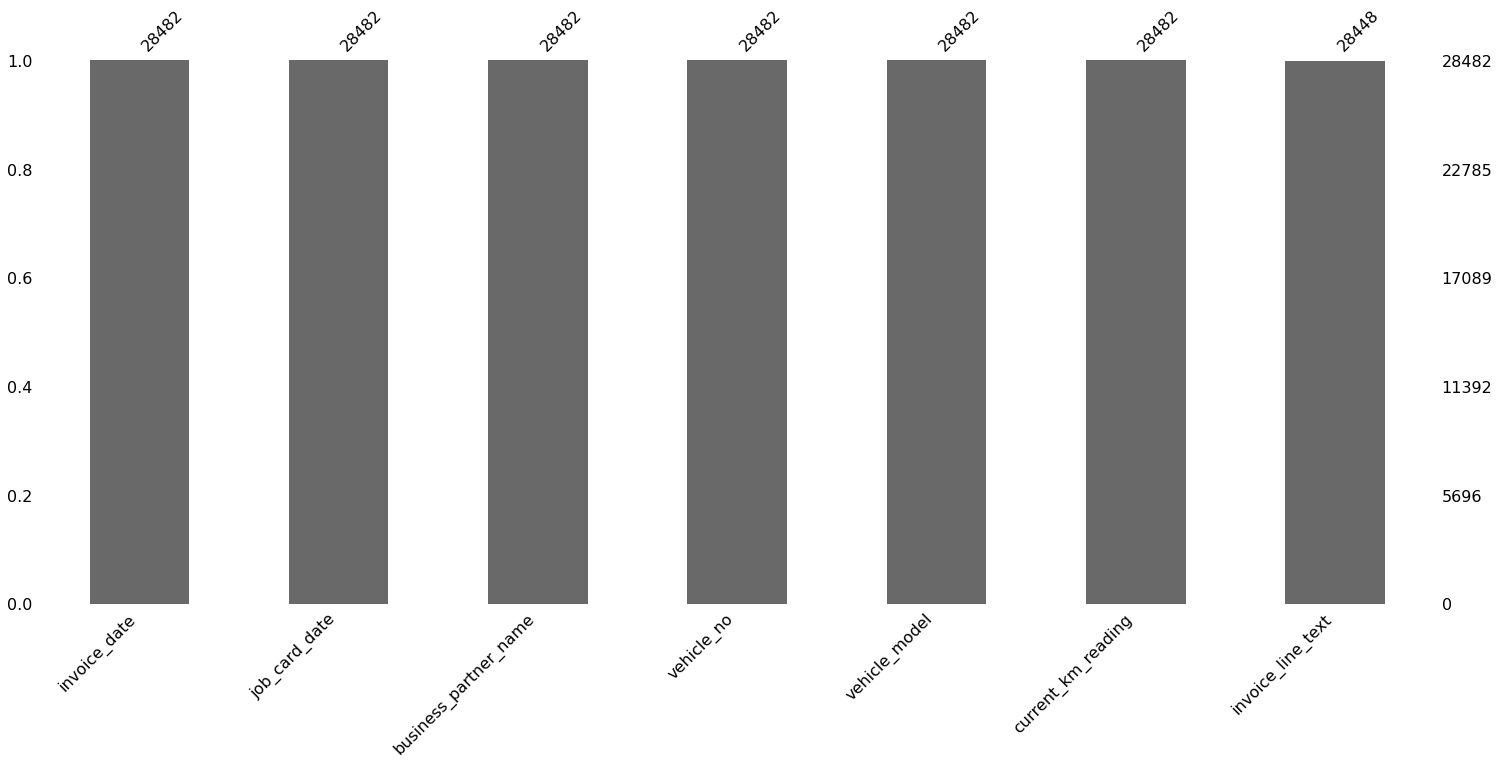

In [ ]:
msno.bar(data)

### **The count of the 7 columns are the 28482, but the last column count is 28448**

# **Visualisation of Top 10 Demanded Spare Parts**

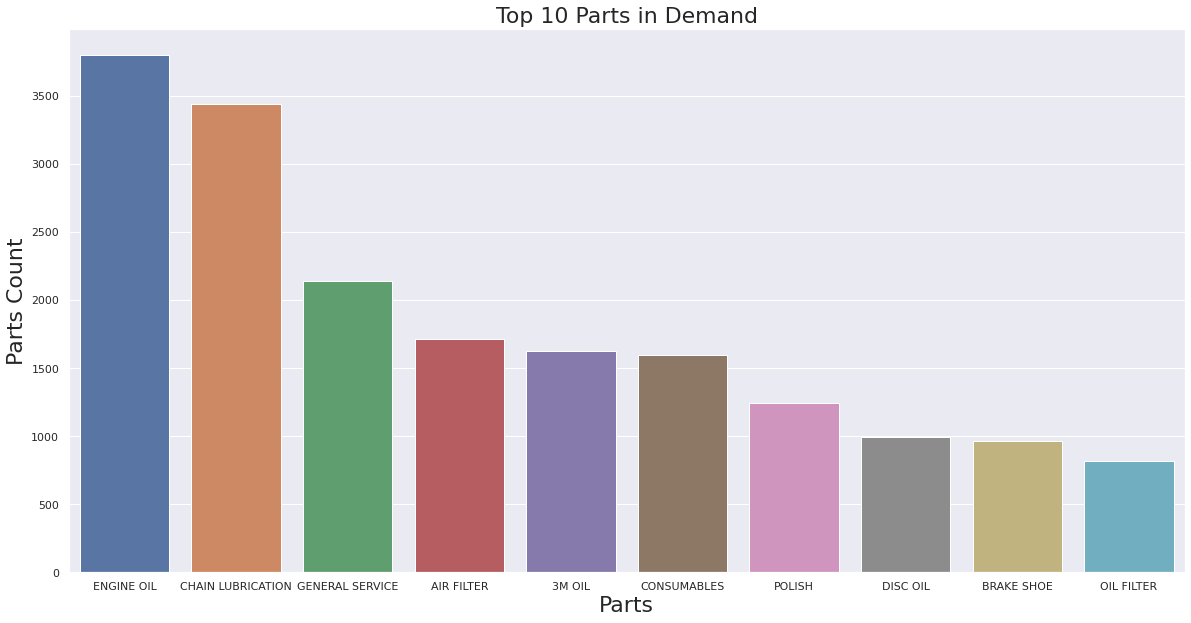

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1 , figsize = (20 , 10))
sns.set(style='darkgrid')
sns.countplot(data['invoice_line_text'], order=data['invoice_line_text'].value_counts().index[:10])
plt.title('Top 10 Parts in Demand', fontdict={'fontsize':22});
plt.ylabel('Parts Count', fontdict={'fontsize':22});
plt.xlabel('Parts', fontdict={'fontsize':22});

>All we need for further forecasting parts requirement are columns 'Job Card Date' and 'INVOICE LINE TEXT'

# **Data Preprocessing**

### **Converting object datatype to datetime64**

In [ ]:
data['invoice_date']= pd.to_datetime(data['invoice_date'])
data['job_card_date']= pd.to_datetime(data['job_card_date'])

#### Invoice_date and  job_card_date columns are in the **object**  datatype. Now, these columns are converting into the **datetime64** datatype.

# **Dropping the missing (NaN) values**

In [ ]:
data=data.dropna() #Droping the missing values

In [ ]:
data.isnull().sum()

invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
invoice_line_text        0
dtype: int64

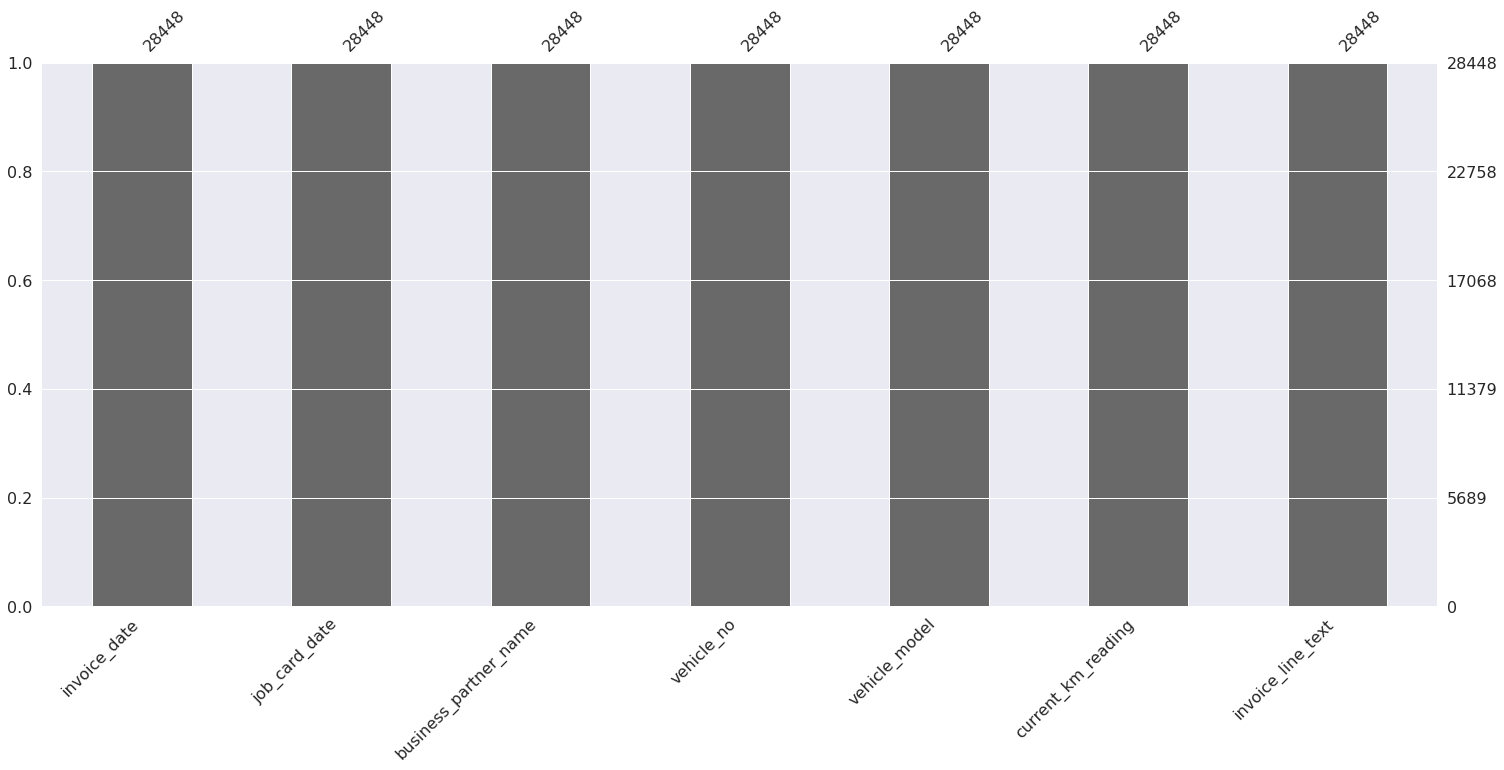

In [ ]:
msno.bar(data)


### After dropping the NaN values. The count of all columns are Now,same.

### **Converting the dates of the data into the serial wise**

In [ ]:
data=data.sort_values(by='job_card_date')
data

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
60,2017-01-06,2017-01-06,vinoXXXXXXXXXX,KA51EVXXXX,BAJAJ AVENGER STREET 220,2750,3M OIL
55,2017-01-06,2017-01-06,PRASXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5500,3M OIL
54,2017-01-06,2017-01-06,PRASXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5500,TANK CLEANING
53,2017-01-06,2017-01-06,PRASXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5500,DRUM BOLT WASHER
52,2017-01-06,2017-01-06,PRASXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 150,5500,CHAIN LUBRICATION
...,...,...,...,...,...,...,...
28455,2019-06-01,2019-06-01,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,CHAIN LUBRICATION
28454,2019-06-01,2019-06-01,dharXXXXXXXXXX,KA41L7XXXX,BAJAJ PULSAR 150,91448,ENGINE OIL
28480,2019-06-01,2019-06-01,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL
28466,2019-06-01,2019-06-01,PRITXXXXXXXXXX,KA53EWXXXX,BAJAJ PULSAR NS 160,2914,POLISH


# **Grouping the 'job_card_date','invoice_line_text' columns**

## **we adding a column as units, Which means number of times this product required for that particular date**

In [ ]:
df=data.groupby(["job_card_date",'invoice_line_text']).size().reset_index(name='units')

In [ ]:
df

,job_card_date,invoice_line_text,units
0,2017-01-06,3M OIL,5
1,2017-01-06,AIR FILTER CHECKUP,3
2,2017-01-06,BRAKE ADJUSTMENT,2
3,2017-01-06,BRAKE SHOE,1
4,2017-01-06,CARBURETOR CLEANING,1
...,...,...,...
12640,2019-06-01,NUMBER PLATE,1
12641,2019-06-01,NUMBER PLATE CLAMP,1
12642,2019-06-01,OIL FILTER,1
12643,2019-06-01,POLISH,2


In [ ]:
df["year"]= pd.to_datetime(df["job_card_date"]).dt.year

In [ ]:
df['month'] = df["job_card_date"].dt.month
df

,job_card_date,invoice_line_text,units,year,month
0,2017-01-06,3M OIL,5,2017,1
1,2017-01-06,AIR FILTER CHECKUP,3,2017,1
2,2017-01-06,BRAKE ADJUSTMENT,2,2017,1
3,2017-01-06,BRAKE SHOE,1,2017,1
4,2017-01-06,CARBURETOR CLEANING,1,2017,1
...,...,...,...,...,...
12640,2019-06-01,NUMBER PLATE,1,2019,6
12641,2019-06-01,NUMBER PLATE CLAMP,1,2019,6
12642,2019-06-01,OIL FILTER,1,2019,6
12643,2019-06-01,POLISH,2,2019,6


In [ ]:
df.job_card_date.unique()

array(['2017-01-06T00:00:00.000000000', '2017-01-07T00:00:00.000000000',
       '2017-01-08T00:00:00.000000000', '2017-01-09T00:00:00.000000000',
       '2017-01-10T00:00:00.000000000', '2017-01-11T00:00:00.000000000',
       '2017-01-12T00:00:00.000000000', '2017-02-06T00:00:00.000000000',
       '2017-02-08T00:00:00.000000000', '2017-02-09T00:00:00.000000000',
       '2017-02-10T00:00:00.000000000', '2017-02-11T00:00:00.000000000',
       '2017-02-12T00:00:00.000000000', '2017-03-06T00:00:00.000000000',
       '2017-03-07T00:00:00.000000000', '2017-03-08T00:00:00.000000000',
       '2017-03-09T00:00:00.000000000', '2017-03-10T00:00:00.000000000',
       '2017-03-11T00:00:00.000000000', '2017-03-12T00:00:00.000000000',
       '2017-04-06T00:00:00.000000000', '2017-04-07T00:00:00.000000000',
       '2017-04-08T00:00:00.000000000', '2017-04-09T00:00:00.000000000',
       '2017-04-10T00:00:00.000000000', '2017-04-11T00:00:00.000000000',
       '2017-04-12T00:00:00.000000000', '2017-05-06

>We observed that from the above unique job_card_date, There is 2018 dates which are only in the continues nature. That's Why we are taking the 2018 year data only. 

In [ ]:
d_2018=df.loc[df['year']==2018]

In [ ]:
d_2018

,job_card_date,invoice_line_text,units,year,month
3946,2018-01-02,3M OIL,2,2018,1
3947,2018-01-02,AIR FILTER,5,2018,1
3948,2018-01-02,BRAKE SHOE,4,2018,1
3949,2018-01-02,CHAIN LUBRICATION,8,2018,1
3950,2018-01-02,CLUTCH ASSEMBLY,2,2018,1
...,...,...,...,...,...
12494,2018-12-31,POLISH,4,2018,12
12495,2018-12-31,SHIELD SQUARE RUBBER,1,2018,12
12496,2018-12-31,SPROCKET BEARING,4,2018,12
12497,2018-12-31,SPROCKET RUBBER,5,2018,12


In [ ]:
d_2018.job_card_date.unique()

array(['2018-01-02T00:00:00.000000000', '2018-01-03T00:00:00.000000000',
       '2018-01-04T00:00:00.000000000', '2018-01-05T00:00:00.000000000',
       '2018-01-06T00:00:00.000000000', '2018-01-07T00:00:00.000000000',
       '2018-01-08T00:00:00.000000000', '2018-01-09T00:00:00.000000000',
       '2018-01-10T00:00:00.000000000', '2018-01-11T00:00:00.000000000',
       '2018-01-12T00:00:00.000000000', '2018-01-13T00:00:00.000000000',
       '2018-01-14T00:00:00.000000000', '2018-01-15T00:00:00.000000000',
       '2018-01-16T00:00:00.000000000', '2018-01-17T00:00:00.000000000',
       '2018-01-18T00:00:00.000000000', '2018-01-19T00:00:00.000000000',
       '2018-01-20T00:00:00.000000000', '2018-01-21T00:00:00.000000000',
       '2018-01-22T00:00:00.000000000', '2018-01-23T00:00:00.000000000',
       '2018-01-24T00:00:00.000000000', '2018-01-25T00:00:00.000000000',
       '2018-01-26T00:00:00.000000000', '2018-01-27T00:00:00.000000000',
       '2018-01-29T00:00:00.000000000', '2018-01-30

In [ ]:
d_2018.units.value_counts()

1     4904
2     1264
3      781
4      467
5      363
6      242
7      171
8      138
9       78
10      64
11      41
12      20
13       8
15       5
14       4
16       2
17       1
Name: units, dtype: int64

>The maximum value inthe units is 17. It mean that inthe year 2018 on one particular date, one particular product is sold 17 times.

In [ ]:
d_2018[d_2018['units']==17]

,job_card_date,invoice_line_text,units,year,month
7395,2018-06-10,ENGINE OIL,17,2018,6


>Engine oil item is sold 17 times on this date.

In [ ]:
d_2018['invoice_line_text'].value_counts().head(10)

ENGINE OIL           351
CHAIN LUBRICATION    350
GENERAL SERVICE      341
3M OIL               328
CONSUMABLES          326
AIR FILTER           320
POLISH               303
BRAKE SHOE           283
OIL FILTER           275
DISC OIL             266
Name: invoice_line_text, dtype: int64

We are taking top sold products for the forecasting.

# **Model BUliding for Forecasting the Top 10 Demanded Products**

# **1. ENGINE_OIL**

In [ ]:
ENGINE_OIL=d_2018[d_2018['invoice_line_text']=='ENGINE OIL']

In [ ]:
ENGINE_OIL

,job_card_date,invoice_line_text,units,year,month
3956,2018-01-02,ENGINE OIL,8,2018,1
3977,2018-01-03,ENGINE OIL,7,2018,1
3990,2018-01-04,ENGINE OIL,5,2018,1
4009,2018-01-05,ENGINE OIL,7,2018,1
4024,2018-01-06,ENGINE OIL,6,2018,1
...,...,...,...,...,...
12391,2018-12-27,ENGINE OIL,10,2018,12
12418,2018-12-28,ENGINE OIL,11,2018,12
12445,2018-12-29,ENGINE OIL,5,2018,12
12461,2018-12-30,ENGINE OIL,3,2018,12


In [ ]:
ENGINE_OIL=ENGINE_OIL.drop(['invoice_line_text', 'year','month'], axis = 1)


In [ ]:
ENGINE_OIL

,job_card_date,units
3956,2018-01-02,8
3977,2018-01-03,7
3990,2018-01-04,5
4009,2018-01-05,7
4024,2018-01-06,6
...,...,...
12391,2018-12-27,10
12418,2018-12-28,11
12445,2018-12-29,5
12461,2018-12-30,3


In [ ]:
ENGINE_OIL.head()

,job_card_date,units
3956,2018-01-02,8
3977,2018-01-03,7
3990,2018-01-04,5
4009,2018-01-05,7
4024,2018-01-06,6


In [ ]:
ENGINE_OIL.set_index(pd.to_datetime(ENGINE_OIL.job_card_date),inplace=True)
ENGINE_OIL.drop('job_card_date', axis = 1, inplace = True)
ENGINE_OIL[-5:]

,units
job_card_date,
2018-12-27,10
2018-12-28,11
2018-12-29,5
2018-12-30,3
2018-12-31,9


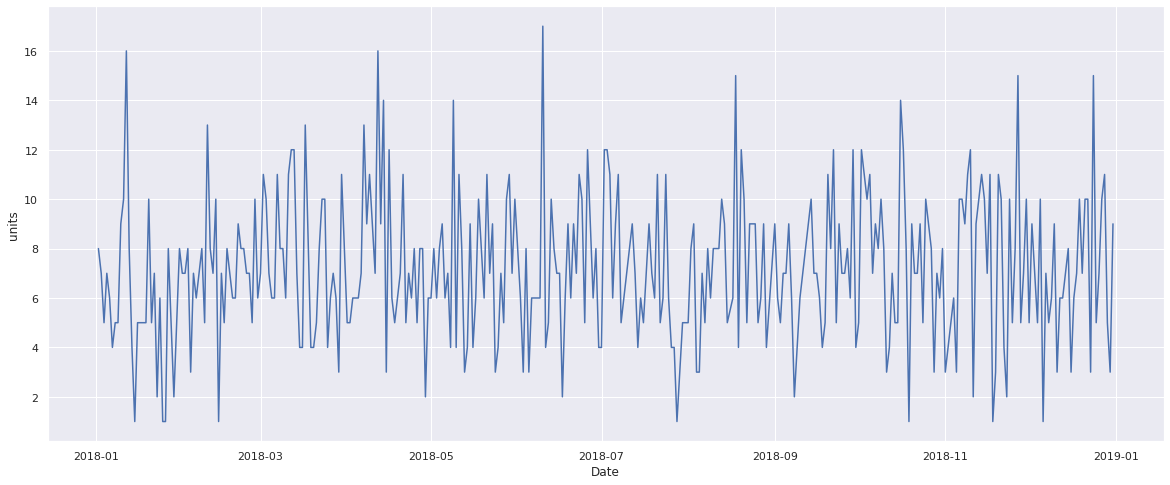

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('units')
plt.plot(ENGINE_OIL.units);

>The above plot indicates like that  Stationary data.

### **What is Stationary Data?**

Time-series data should satisfy the following conditions to be stationary:
1. The mean values of Yt at different values of t are constant.

2. The variances of Yt at different time periods are constant (Homoscedasticity).

3. The covariance of Yt and Yt−k for different lags depend only on k and not on time t.

# **Dicky−Fuller Test:**

To find out if a time series is stationary, Dickey−Fuller (Dickey and Fuller, 1979) test can also be conducted. Dickey–Fuller test checks whether the b in Eq. (Yt+1 − m = b (Yt − m) + et+1) is equal to 1 or less than equal to 1. It is a hypothesis test in which the null hypothesis and alternative hypothesis are given by

H0: b = 1 (the time series is non-stationary)

HA: b < 1 (the time series is stationary)

statsmodels.tsa.stattools.adfuller is a Dicky−Fuller test and returns test statistics and p-value for the testof the null hypothesis. 
#### **If the p-value is less than 0.05, the time series is stationary.**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(ts):
  adfuller_result = adfuller(ts, autolag=None)
  adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(adfuller_out)

In [ ]:
adfuller_test(ENGINE_OIL.units) 

Test Statistic                  -4.738859
p-value                          0.000071
Lags Used                       17.000000
Number of Observations Used    333.000000
dtype: float64


>**The p-value is less than 0.05, the time series is stationary**

#  **ARMA models can be used only when the time-series data is stationary.**

# **ARMA Model:**


Auto-regressive moving average (ARMA) is a combination auto-regressive and moving average process.
ARMA(p, q) process combines AR(p) and MA(q) processes.
The values of p and q in an ARMA process can be identified using the following thumb rules:
1. Auto-correlation values are significant for first q values (first q lags) and cuts off to zero.
2. Partial auto-correlation values are significant for first p values and cuts off to zero.

# **Auto-Regressive (AR) Models:**
Auto-regression is a regression of a variable on itself measured at different time points.

Auto-regressive model with lag 1, AR (1), is given by
Yt+1= m + bYt+ et+1 (1)

Equation (1) can be generalized to include p lags on the right-hand side and is called a AR (p) model.

Equation (1) can be re-written as

Yt+1 − m = b (Yt − m) + et+1 (1)

where et+1 is a sequence of uncorrelated residuals assumed to follow the normal distribution with zero mean and constant standard deviation. (Yt − m) can be interpreted as a deviation from mean value m;it is known as mean centered series.

One of the important tasks in using the AR model in forecasting is model identification, which is, identifying the value of p (the number of lags). One of the standard approaches used for model identification is using auto-correlation function (ACF) and partial auto-correlation function (PACF).

### **Moving Average (MA) Processes:**
MA processes are regression models in which the past residuals are used for forecasting future values of
the time-series data.
A moving average process of lag 1 can be written as
Yt+1 = α1εt+εt+1 (3)
The model in Eq. (3) can be generalized to q lags. The value of q (number of lags) in a moving average process can be identified using the following rules (Yaffee and McGee, 2000):
1. Auto-correlation value is significant for first q lags and cuts off to zero.
2. The PACF decreases exponentially.

## **ACF:**
Auto-correlation of lag k is the correlation between Yt and Yt–k measured at different k values (e.g., Yt and Yt−1 or Yt and Yt−2). A plot of auto-correlation for different values of k is called an auto-correlation
function (ACF) or correlogram.

statsmodels.graphics.tsaplots.plot_acf plots the autocorrelation plot.

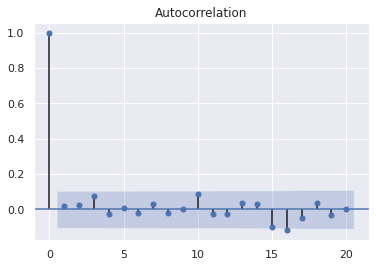

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(ENGINE_OIL.units,lags=20)

# **PACF:**

Partial auto-correlation of lag k is the correlation between Yt and Yt−k when the influence of all intermediate values (Yt−1, Yt−2, ..., Yt−k+1) is removed (partial out) from both Yt and Yt−k. A plot of partial auto-correlation for different values of k is called partial auto-correlation function (PACF).

statsmodels.graphics.tsaplots.plot_pacf plots the partial auto-correlation plot.

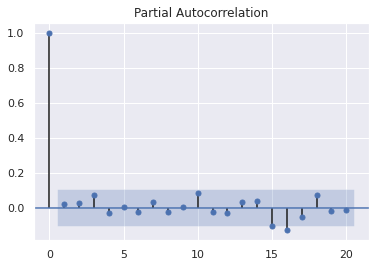

In [ ]:
pacf_plot = plot_pacf(ENGINE_OIL.units,lags=20 )

Based on the ACF and PACF plots in the previous section, we will develop ARMA(1, 1) model using the following codes:

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
arima = ARIMA(ENGINE_OIL.units[0:300].astype(np.float64).to_numpy(), order = (1,0,1))

arma_model = arima.fit()

arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 1504.4435
Dependent Variable: y                Log-Likelihood:      -740.81  
Date:               2021-08-11 13:55 Scale:               1.0000   
No. Observations:   300              Method:              css-mle  
Df Model:           3                Sample:              0        
Df Residuals:       297                                   0        
Converged:          1.0000           S.D. of innovations: 2.859    
No. Iterations:     13.0000          HQIC:                1495.557 
AIC:                1489.6284                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const         7.1547     0.1957   36.5589   0.0000    6.7712   7.5383
ar.L1.y       0.5816     0.3382    1.7198   0.0865   -0.0812   1.2445
ma.L1.y      -0.5034     0.3574   -1.4087   0.1600   -1.2039   0.1970
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.7194             0.0000           1.7194             0.0000
MA.1           1.9863             0.0000           1.9863             0.0000
===================================================================

"""

# **Forecasting:**

In [ ]:
forecast_301_351 = arma_model.predict(300, 350) 
forecast_301_351

array([7.74901651, 7.50037499, 7.35576194, 7.27165316, 7.22273444,
       7.19428269, 7.17773479, 7.16811032, 7.16251261, 7.15925691,
       7.15736336, 7.15626204, 7.1556215 , 7.15524896, 7.15503228,
       7.15490626, 7.15483296, 7.15479033, 7.15476554, 7.15475112,
       7.15474273, 7.15473785, 7.15473501, 7.15473336, 7.1547324 ,
       7.15473185, 7.15473152, 7.15473133, 7.15473122, 7.15473116,
       7.15473112, 7.1547311 , 7.15473109, 7.15473108, 7.15473108,
       7.15473107, 7.15473107, 7.15473107, 7.15473107, 7.15473107,
       7.15473107, 7.15473107, 7.15473107, 7.15473107, 7.15473107,
       7.15473107, 7.15473107, 7.15473107, 7.15473107, 7.15473107,
       7.15473107])

## **Mean Absolute Percentage Error:**


Mean absolute percentage error (MAPE) is the average of absolute percentage error. Assume that the validation data has n observations and forecasting is carried out on these n observations. MAPE is one of the popular forecasting accuracy measures used by practitioners since it expresses the
average error in percentage terms and is easy to interpret. Since MAPE is dimensionless, it can be used
for comparing different models with varying scales.

The following custom method get_mape() takes the series of actual values and foretasted values, and
returns the MAPE.

In [ ]:
import numpy as np
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual))* 100, 2 )

In [ ]:
get_mape(ENGINE_OIL.units[300:], forecast_301_351 )

70.01

In [ ]:
test=ENGINE_OIL.units[300:]
type(test)
test=test.to_frame()


In [ ]:
forecast_301_351

array([7.74901651, 7.50037499, 7.35576194, 7.27165316, 7.22273444,
       7.19428269, 7.17773479, 7.16811032, 7.16251261, 7.15925691,
       7.15736336, 7.15626204, 7.1556215 , 7.15524896, 7.15503228,
       7.15490626, 7.15483296, 7.15479033, 7.15476554, 7.15475112,
       7.15474273, 7.15473785, 7.15473501, 7.15473336, 7.1547324 ,
       7.15473185, 7.15473152, 7.15473133, 7.15473122, 7.15473116,
       7.15473112, 7.1547311 , 7.15473109, 7.15473108, 7.15473108,
       7.15473107, 7.15473107, 7.15473107, 7.15473107, 7.15473107,
       7.15473107, 7.15473107, 7.15473107, 7.15473107, 7.15473107,
       7.15473107, 7.15473107, 7.15473107, 7.15473107, 7.15473107,
       7.15473107])

In [ ]:
test['forecasted']=forecast_301_351


In [ ]:
test

,units,forecasted
job_card_date,,
2018-11-11,2,7.749017
2018-11-12,9,7.500375
2018-11-13,10,7.355762
2018-11-14,11,7.271653
2018-11-15,10,7.222734
2018-11-16,7,7.194283
2018-11-17,11,7.177735
2018-11-18,1,7.168110
2018-11-19,3,7.162513


Nearly we need 7 or 8 Engine oils in  each day. 

# **Forecasting:**

In [ ]:
forecast_301_351 = arma_model.predict(300, 350) 
forecast_301_351

array([7.74901651, 7.50037499, 7.35576194, 7.27165316, 7.22273444,
       7.19428269, 7.17773479, 7.16811032, 7.16251261, 7.15925691,
       7.15736336, 7.15626204, 7.1556215 , 7.15524896, 7.15503228,
       7.15490626, 7.15483296, 7.15479033, 7.15476554, 7.15475112,
       7.15474273, 7.15473785, 7.15473501, 7.15473336, 7.1547324 ,
       7.15473185, 7.15473152, 7.15473133, 7.15473122, 7.15473116,
       7.15473112, 7.1547311 , 7.15473109, 7.15473108, 7.15473108,
       7.15473107, 7.15473107, 7.15473107, 7.15473107, 7.15473107,
       7.15473107, 7.15473107, 7.15473107, 7.15473107, 7.15473107,
       7.15473107, 7.15473107, 7.15473107, 7.15473107, 7.15473107,
       7.15473107])

## **Mean Absolute Percentage Error:**


Mean absolute percentage error (MAPE) is the average of absolute percentage error. Assume that the validation data has n observations and forecasting is carried out on these n observations. MAPE is one of the popular forecasting accuracy measures used by practitioners since it expresses the
average error in percentage terms and is easy to interpret. Since MAPE is dimensionless, it can be used
for comparing different models with varying scales.

The following custom method get_mape() takes the series of actual values and foretasted values, and
returns the MAPE.

In [ ]:
import numpy as np
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual))* 100, 2 )

In [ ]:
get_mape(ENGINE_OIL.units[300:], forecast_301_351 )

70.01

In [ ]:
test=ENGINE_OIL.units[300:]
type(test)
test=test.to_frame()


In [ ]:
forecast_301_351

array([7.74901651, 7.50037499, 7.35576194, 7.27165316, 7.22273444,
       7.19428269, 7.17773479, 7.16811032, 7.16251261, 7.15925691,
       7.15736336, 7.15626204, 7.1556215 , 7.15524896, 7.15503228,
       7.15490626, 7.15483296, 7.15479033, 7.15476554, 7.15475112,
       7.15474273, 7.15473785, 7.15473501, 7.15473336, 7.1547324 ,
       7.15473185, 7.15473152, 7.15473133, 7.15473122, 7.15473116,
       7.15473112, 7.1547311 , 7.15473109, 7.15473108, 7.15473108,
       7.15473107, 7.15473107, 7.15473107, 7.15473107, 7.15473107,
       7.15473107, 7.15473107, 7.15473107, 7.15473107, 7.15473107,
       7.15473107, 7.15473107, 7.15473107, 7.15473107, 7.15473107,
       7.15473107])

In [ ]:
test['forecasting_units']=forecast_301_351

In [ ]:
test.head(10)

,units,forecasting_units
job_card_date,,
2018-11-11,2,7.749017
2018-11-12,9,7.500375
2018-11-13,10,7.355762
2018-11-14,11,7.271653
2018-11-15,10,7.222734
2018-11-16,7,7.194283
2018-11-17,11,7.177735
2018-11-18,1,7.168110
2018-11-19,3,7.162513


we need minimum 7 or 8 Engine Oils for daily.

# **2.CHAIN LUBRICATION**

In [ ]:
CHAIN_LUBRICATION=d_2018[d_2018['invoice_line_text']=='CHAIN LUBRICATION']

In [ ]:
CHAIN_LUBRICATION

,job_card_date,invoice_line_text,units,year,month
3949,2018-01-02,CHAIN LUBRICATION,8,2018,1
3968,2018-01-03,CHAIN LUBRICATION,5,2018,1
3988,2018-01-04,CHAIN LUBRICATION,5,2018,1
4001,2018-01-05,CHAIN LUBRICATION,8,2018,1
4022,2018-01-06,CHAIN LUBRICATION,7,2018,1
...,...,...,...,...,...
12380,2018-12-27,CHAIN LUBRICATION,9,2018,12
12408,2018-12-28,CHAIN LUBRICATION,11,2018,12
12438,2018-12-29,CHAIN LUBRICATION,6,2018,12
12456,2018-12-30,CHAIN LUBRICATION,1,2018,12


In [ ]:
CHAIN_LUBRICATION=CHAIN_LUBRICATION.drop(['invoice_line_text', 'year','month'], axis = 1)

In [ ]:
CHAIN_LUBRICATION

,job_card_date,units
3949,2018-01-02,8
3968,2018-01-03,5
3988,2018-01-04,5
4001,2018-01-05,8
4022,2018-01-06,7
...,...,...
12380,2018-12-27,9
12408,2018-12-28,11
12438,2018-12-29,6
12456,2018-12-30,1


In [ ]:
CHAIN_LUBRICATION.set_index(pd.to_datetime(CHAIN_LUBRICATION.job_card_date),inplace=True)
CHAIN_LUBRICATION.drop('job_card_date', axis = 1, inplace = True)
CHAIN_LUBRICATION[-5:]

,units
job_card_date,
2018-12-27,9
2018-12-28,11
2018-12-29,6
2018-12-30,1
2018-12-31,8


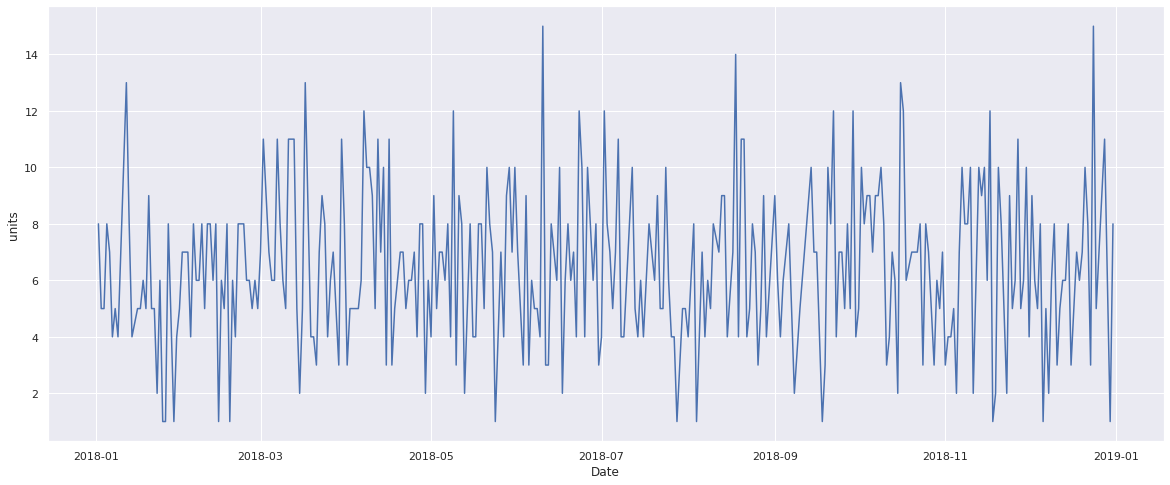

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('units')
plt.plot(CHAIN_LUBRICATION.units);

In [ ]:
CHAIN_LUBRICATION.shape

(350, 1)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(ts):
  adfuller_result = adfuller(ts, autolag=None)
  adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(adfuller_out)

In [ ]:
adfuller_test(CHAIN_LUBRICATION.units) 

Test Statistic                  -5.042371
p-value                          0.000018
Lags Used                       17.000000
Number of Observations Used    332.000000
dtype: float64


**The p-value is less than 0.05, the time series is stationary**

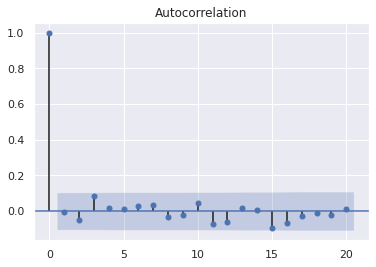

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(CHAIN_LUBRICATION.units,lags=20)

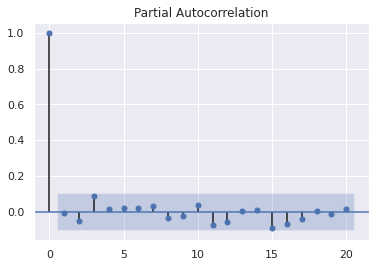

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf_plot = plot_pacf(CHAIN_LUBRICATION.units,lags=20)

Based on the ACF and PACF plots in the previous section, we will develop ARMA(1, 1) model using the following codes:

# ARMA models can be used only when the time-series data is stationary.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
type(CHAIN_LUBRICATION.units)

pandas.core.series.Series

In [ ]:
arima = ARIMA(CHAIN_LUBRICATION.units[0:300].astype(np.int64).to_numpy(), order = (2,0,1))

arma_model = arima.fit()
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 1470.6352
Dependent Variable: y                Log-Likelihood:      -721.06  
Date:               2021-08-11 13:55 Scale:               1.0000   
No. Observations:   300              Method:              css-mle  
Df Model:           4                Sample:              0        
Df Residuals:       296                                   0        
Converged:          1.0000           S.D. of innovations: 2.677    
No. Iterations:     11.0000          HQIC:                1459.528 
AIC:                1452.1163                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const         6.4031     0.1528   41.9139   0.0000    6.1037   6.7026
ar.L1.y      -0.3959     0.4423   -0.8951   0.3714   -1.2627   0.4709
ar.L2.y      -0.0437     0.0622   -0.7032   0.4825   -0.1656   0.0782
ma.L1.y       0.4230     0.4396    0.9622   0.3367   -0.4386   1.2845
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -4.5257            -1.5433           4.7816            -0.4477
AR.2          -4.5257             1.5433           4.7816             0.4477
MA.1          -2.3643             0.0000           2.3643             0.5000
===================================================================

"""

In [ ]:
forecast_301_350 = arma_model.predict(300, 349) 
forecast_301_350

array([6.11781112, 6.70867969, 6.29465898, 6.43272119, 6.39617246,
       6.4046031 , 6.40286408, 6.4031838 , 6.40313329, 6.4031393 ,
       6.40313913, 6.40313893, 6.40313902, 6.40313899, 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ])

In [ ]:
import numpy as np
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual))* 100, 2 )

In [ ]:
get_mape(CHAIN_LUBRICATION.units[300:], forecast_301_350 )

71.89

In [ ]:
test_CHAIN_LUBRICATION=CHAIN_LUBRICATION.units[300:]
type(test_CHAIN_LUBRICATION)
test_CHAIN_LUBRICATION=test_CHAIN_LUBRICATION.to_frame()

In [ ]:
forecast_301_350

array([6.11781112, 6.70867969, 6.29465898, 6.43272119, 6.39617246,
       6.4046031 , 6.40286408, 6.4031838 , 6.40313329, 6.4031393 ,
       6.40313913, 6.40313893, 6.40313902, 6.40313899, 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ,
       6.403139  , 6.403139  , 6.403139  , 6.403139  , 6.403139  ])

In [ ]:
test_CHAIN_LUBRICATION['forecasting_units']=forecast_301_350

In [ ]:
test_CHAIN_LUBRICATION

,units,forecasting_units
job_card_date,,
2018-11-12,6,6.117811
2018-11-13,10,6.708680
2018-11-14,9,6.294659
2018-11-15,10,6.432721
2018-11-16,6,6.396172
2018-11-17,12,6.404603
2018-11-18,1,6.402864
2018-11-19,2,6.403184
2018-11-20,10,6.403133


Nearly we nedd 6 or 7 items of CHAIN_LUBRICATION for single day

# **3.GENERAL SERVICE**

In [ ]:
GENERAL_SERVICE=d_2018[d_2018['invoice_line_text']=='GENERAL SERVICE']

In [ ]:
GENERAL_SERVICE

,job_card_date,invoice_line_text,units,year,month
3959,2018-01-02,GENERAL SERVICE,6,2018,1
3978,2018-01-03,GENERAL SERVICE,1,2018,1
3991,2018-01-04,GENERAL SERVICE,1,2018,1
4010,2018-01-05,GENERAL SERVICE,5,2018,1
4025,2018-01-06,GENERAL SERVICE,2,2018,1
...,...,...,...,...,...
12397,2018-12-27,GENERAL SERVICE,4,2018,12
12425,2018-12-28,GENERAL SERVICE,3,2018,12
12446,2018-12-29,GENERAL SERVICE,2,2018,12
12463,2018-12-30,GENERAL SERVICE,2,2018,12


In [ ]:
GENERAL_SERVICE=GENERAL_SERVICE.drop(['invoice_line_text', 'year','month'], axis = 1)

In [ ]:
GENERAL_SERVICE

,job_card_date,units
3959,2018-01-02,6
3978,2018-01-03,1
3991,2018-01-04,1
4010,2018-01-05,5
4025,2018-01-06,2
...,...,...
12397,2018-12-27,4
12425,2018-12-28,3
12446,2018-12-29,2
12463,2018-12-30,2


In [ ]:
GENERAL_SERVICE.set_index(pd.to_datetime(GENERAL_SERVICE.job_card_date),inplace=True)
GENERAL_SERVICE.drop('job_card_date', axis = 1, inplace = True)
GENERAL_SERVICE[-5:]

,units
job_card_date,
2018-12-27,4
2018-12-28,3
2018-12-29,2
2018-12-30,2
2018-12-31,6


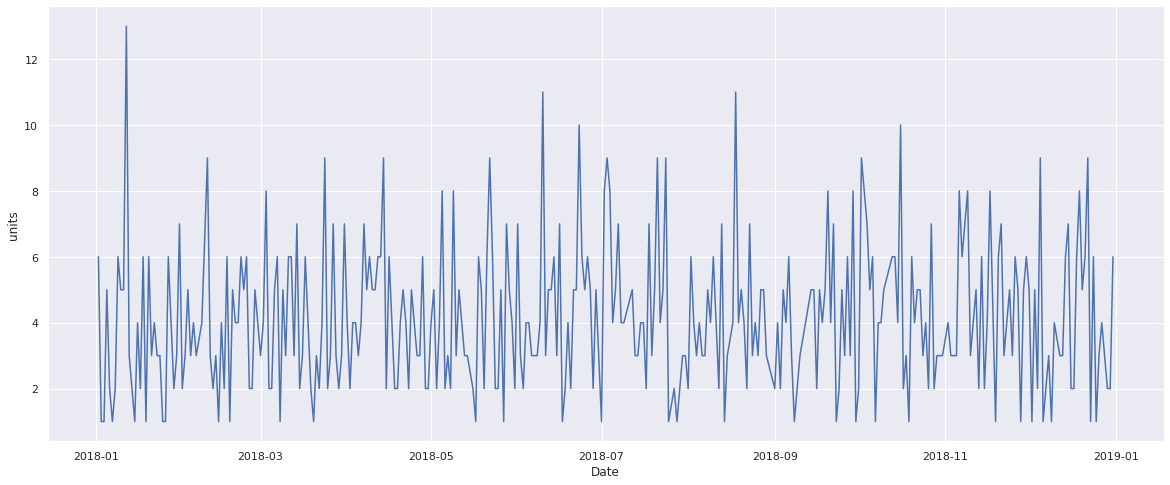

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('units')
plt.plot(GENERAL_SERVICE.units);

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(ts):
  adfuller_result = adfuller(ts, autolag=None)
  adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(adfuller_out)

In [ ]:
adfuller_test(GENERAL_SERVICE.units) 

Test Statistic                  -4.088031
p-value                          0.001014
Lags Used                       17.000000
Number of Observations Used    323.000000
dtype: float64


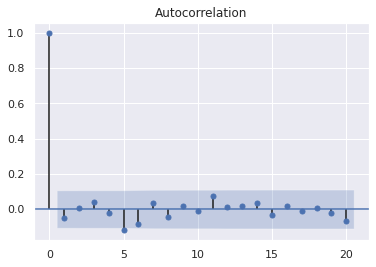

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(GENERAL_SERVICE.units,lags=20)

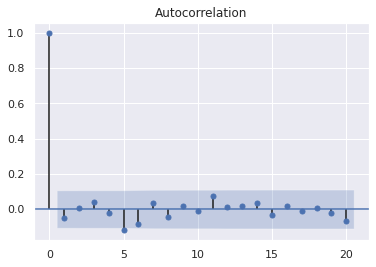

In [ ]:
pacf_plot = plot_acf(GENERAL_SERVICE.units,lags=20)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
arima = ARIMA(GENERAL_SERVICE.units[0:300].astype(np.int64).to_numpy(), order = (1,0,1))

arma_model = arima.fit()
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 1338.7118
Dependent Variable: y                Log-Likelihood:      -657.95  
Date:               2021-08-11 13:56 Scale:               1.0000   
No. Observations:   300              Method:              css-mle  
Df Model:           3                Sample:              0        
Df Residuals:       297                                   0        
Converged:          1.0000           S.D. of innovations: 2.169    
No. Iterations:     13.0000          HQIC:                1329.826 
AIC:                1323.8966                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const         4.1595     0.1219   34.1122   0.0000    3.9205   4.3985
ar.L1.y      -0.0508     1.1684   -0.0435   0.9653   -2.3408   2.2392
ma.L1.y       0.0231     1.1685    0.0198   0.9842   -2.2670   2.3133
---------------------------------------------------------------------------
                 Real           Imaginary         Modulus         Frequency
---------------------------------------------------------------------------
AR.1           -19.6736            0.0000         19.6736            0.5000
MA.1           -43.2353            0.0000         43.2353            0.5000
===================================================================

"""

In [ ]:
forecast_301_341 = arma_model.predict(300, 340) 
forecast_301_341

array([4.05304136, 4.1649055 , 4.15921948, 4.1595085 , 4.15949381,
       4.15949456, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452])

In [ ]:
import numpy as np
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual))* 100, 2 )

In [ ]:
get_mape(GENERAL_SERVICE.units[300:], forecast_301_341 )

90.49

In [ ]:
test_GENERAL_SERVICE=GENERAL_SERVICE.units[300:]
type(test_CHAIN_LUBRICATION)
test_GENERAL_SERVICE=test_GENERAL_SERVICE.to_frame()

In [ ]:
forecast_301_341

array([4.05304136, 4.1649055 , 4.15921948, 4.1595085 , 4.15949381,
       4.15949456, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452, 4.15949452, 4.15949452, 4.15949452, 4.15949452,
       4.15949452])

In [ ]:
test_GENERAL_SERVICE['forecasting_units']=forecast_301_341

In [ ]:
test_GENERAL_SERVICE

,units,forecasting_units
job_card_date,,
2018-11-19,1,4.053041
2018-11-20,6,4.164905
2018-11-21,7,4.159219
2018-11-22,3,4.159508
2018-11-24,5,4.159494
2018-11-25,3,4.159495
2018-11-26,6,4.159495
2018-11-27,5,4.159495
2018-11-28,1,4.159495


Nearly, we get 4 GENERAL SERVICE in each day in future.

# **4. 3M OIL**

In [ ]:
OIL=d_2018[d_2018['invoice_line_text']=='3M OIL']

In [ ]:
OIL

,job_card_date,invoice_line_text,units,year,month
3946,2018-01-02,3M OIL,2,2018,1
3965,2018-01-03,3M OIL,5,2018,1
3984,2018-01-04,3M OIL,3,2018,1
3995,2018-01-05,3M OIL,2,2018,1
4018,2018-01-06,3M OIL,4,2018,1
...,...,...,...,...,...
12376,2018-12-27,3M OIL,6,2018,12
12405,2018-12-28,3M OIL,7,2018,12
12436,2018-12-29,3M OIL,4,2018,12
12453,2018-12-30,3M OIL,1,2018,12


In [ ]:
OIL=OIL.drop(['invoice_line_text', 'year','month'], axis = 1)

In [ ]:
OIL

,job_card_date,units
3946,2018-01-02,2
3965,2018-01-03,5
3984,2018-01-04,3
3995,2018-01-05,2
4018,2018-01-06,4
...,...,...
12376,2018-12-27,6
12405,2018-12-28,7
12436,2018-12-29,4
12453,2018-12-30,1


In [ ]:
OIL.set_index(pd.to_datetime(OIL.job_card_date),inplace=True)
OIL.drop('job_card_date', axis = 1, inplace = True)
OIL[-5:]

,units
job_card_date,
2018-12-27,6
2018-12-28,7
2018-12-29,4
2018-12-30,1
2018-12-31,3


In [ ]:
OIL.shape

(328, 1)

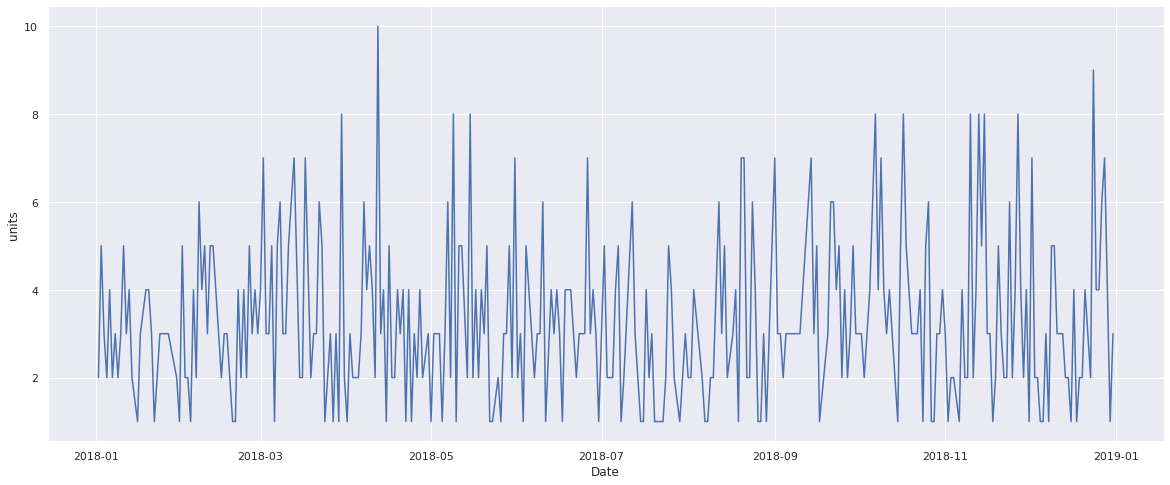

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('units')
plt.plot(OIL.units);

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(ts):
  adfuller_result = adfuller(ts, autolag=None)
  adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(adfuller_out)

In [ ]:
adfuller_test(OIL.units) 

Test Statistic                  -3.956510
p-value                          0.001656
Lags Used                       17.000000
Number of Observations Used    310.000000
dtype: float64


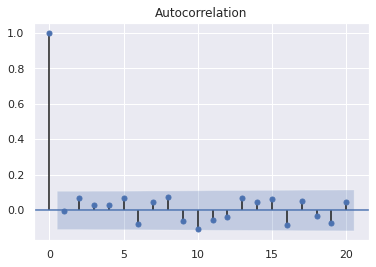

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(OIL.units,lags=20)

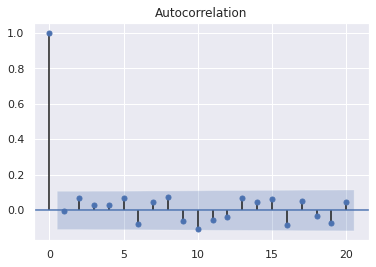

In [ ]:
pacf_plot = plot_acf(OIL.units,lags=20)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
arima = ARIMA(OIL.units[0:300].astype(np.int64).to_numpy(), order = (2,0,1))

arma_model = arima.fit()
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 1230.5196
Dependent Variable: y                Log-Likelihood:      -601.00  
Date:               2021-08-11 13:56 Scale:               1.0000   
No. Observations:   300              Method:              css-mle  
Df Model:           4                Sample:              0        
Df Residuals:       296                                   0        
Converged:          1.0000           S.D. of innovations: 1.794    
No. Iterations:     19.0000          HQIC:                1219.412 
AIC:                1212.0007                                      
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const        3.2778     0.1185   27.6676   0.0000    3.0456    3.5100
ar.L1.y      0.6276     0.3263    1.9233   0.0554   -0.0120    1.2672
ar.L2.y      0.0787     0.0586    1.3435   0.1801   -0.0361    0.1936
ma.L1.y     -0.6633     0.3237   -2.0493   0.0413   -1.2977   -0.0289
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.3610             0.0000           1.3610             0.0000
AR.2          -9.3322             0.0000           9.3322             0.5000
MA.1           1.5076             0.0000           1.5076             0.0000
===================================================================

"""

In [ ]:
forecast_301_327 = arma_model.predict(301, 327) 
forecast_301_327

array([3.48544103, 3.30750219, 3.3127809 , 3.30208393, 3.29578596,
       3.29099103, 3.28748579, 3.28490832, 3.28301467, 3.28162326,
       3.28060088, 3.27984968, 3.27929771, 3.27889214, 3.27859414,
       3.27837518, 3.27821429, 3.27809607, 3.27800921, 3.27794539,
       3.2778985 , 3.27786404, 3.27783872, 3.27782012, 3.27780645,
       3.2777964 , 3.27778902, 3.2777836 ])

In [ ]:
import numpy as np
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual))* 100, 2 )

In [ ]:
get_mape(OIL.units[300:], forecast_301_327 )

76.68

In [ ]:
test_OIL=OIL.units[300:]
type(test_CHAIN_LUBRICATION)
test_OIL=test_OIL.to_frame()

In [ ]:
forecast_301_327

array([3.48544103, 3.30750219, 3.3127809 , 3.30208393, 3.29578596,
       3.29099103, 3.28748579, 3.28490832, 3.28301467, 3.28162326,
       3.28060088, 3.27984968, 3.27929771, 3.27889214, 3.27859414,
       3.27837518, 3.27821429, 3.27809607, 3.27800921, 3.27794539,
       3.2778985 , 3.27786404, 3.27783872, 3.27782012, 3.27780645,
       3.2777964 , 3.27778902, 3.2777836 ])

In [ ]:
test_OIL['forecasting_units']=forecast_301_327

In [ ]:
test_OIL

,units,forecasting_units
job_card_date,,
2018-12-04,2,3.485441
2018-12-05,1,3.307502
2018-12-06,1,3.312781
2018-12-07,3,3.302084
2018-12-08,1,3.295786
2018-12-09,5,3.290991
2018-12-10,5,3.287486
2018-12-11,3,3.284908
2018-12-12,3,3.283015


Nearly we need minimum 3 or 4 3M OILS in future.

# **5. CONSUMABLES**

In [ ]:
CONSUMABLES=d_2018[d_2018['invoice_line_text']=='CONSUMABLES']

In [ ]:
CONSUMABLES

,job_card_date,invoice_line_text,units,year,month
3954,2018-01-02,CONSUMABLES,2,2018,1
3974,2018-01-03,CONSUMABLES,5,2018,1
3989,2018-01-04,CONSUMABLES,2,2018,1
4003,2018-01-05,CONSUMABLES,3,2018,1
4023,2018-01-06,CONSUMABLES,4,2018,1
...,...,...,...,...,...
12385,2018-12-27,CONSUMABLES,6,2018,12
12415,2018-12-28,CONSUMABLES,7,2018,12
12440,2018-12-29,CONSUMABLES,4,2018,12
12459,2018-12-30,CONSUMABLES,1,2018,12


In [ ]:
CONSUMABLES=CONSUMABLES.drop(['invoice_line_text', 'year','month'], axis = 1)

In [ ]:
CONSUMABLES

,job_card_date,units
3954,2018-01-02,2
3974,2018-01-03,5
3989,2018-01-04,2
4003,2018-01-05,3
4023,2018-01-06,4
...,...,...
12385,2018-12-27,6
12415,2018-12-28,7
12440,2018-12-29,4
12459,2018-12-30,1


In [ ]:
CONSUMABLES.set_index(pd.to_datetime(CONSUMABLES.job_card_date),inplace=True)
CONSUMABLES.drop('job_card_date', axis = 1, inplace = True)
CONSUMABLES[-5:]

,units
job_card_date,
2018-12-27,6
2018-12-28,7
2018-12-29,4
2018-12-30,1
2018-12-31,4


In [ ]:
CONSUMABLES.shape

(326, 1)

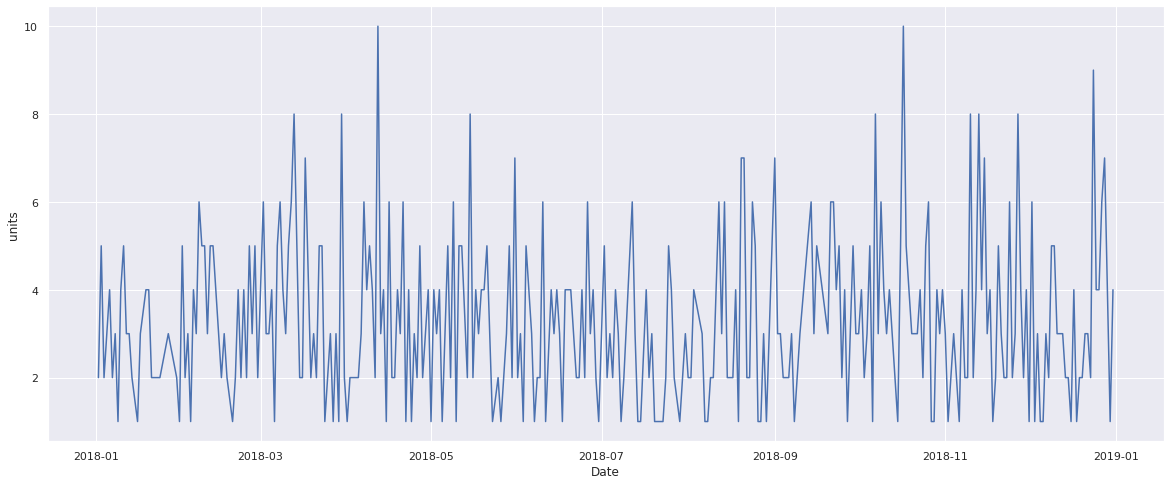

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('units')
plt.plot(CONSUMABLES.units);

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(ts):
  adfuller_result = adfuller(ts, autolag=None)
  adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(adfuller_out)

In [ ]:
adfuller_test(CONSUMABLES.units) 

Test Statistic                  -4.181628
p-value                          0.000708
Lags Used                       17.000000
Number of Observations Used    308.000000
dtype: float64


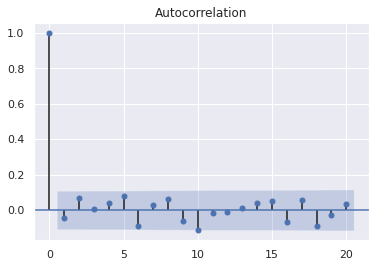

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(CONSUMABLES.units,lags=20)

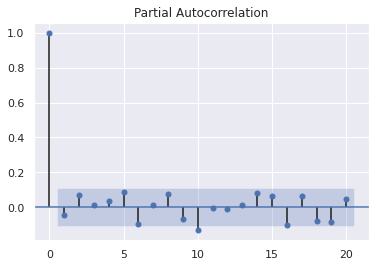

In [ ]:
pacf_plot = plot_pacf(CONSUMABLES.units,lags=20)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
arima = ARIMA(CONSUMABLES.units[0:300].astype(np.int64).to_numpy(), order = (1,0,1))

arma_model = arima.fit()
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 1226.2960
Dependent Variable: y                Log-Likelihood:      -601.74  
Date:               2021-08-11 13:56 Scale:               1.0000   
No. Observations:   300              Method:              css-mle  
Df Model:           3                Sample:              0        
Df Residuals:       297                                   0        
Converged:          1.0000           S.D. of innovations: 1.798    
No. Iterations:     12.0000          HQIC:                1217.410 
AIC:                1211.4808                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const         3.2642     0.0984   33.1887   0.0000    3.0714   3.4570
ar.L1.y      -0.4968     0.3342   -1.4866   0.1382   -1.1518   0.1582
ma.L1.y       0.4177     0.3473    1.2029   0.2300   -0.2629   1.0984
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -2.0128             0.0000           2.0128             0.5000
MA.1          -2.3939             0.0000           2.3939             0.5000
===================================================================

"""

In [ ]:
forecast_301_325 = arma_model.predict(301, 325) 
forecast_301_325

array([3.4881048 , 3.15297417, 3.3194751 , 3.23675344, 3.27785154,
       3.25743302, 3.26757743, 3.26253745, 3.26504143, 3.26379739,
       3.26441546, 3.26410839, 3.26426095, 3.26418515, 3.26422281,
       3.2642041 , 3.2642134 , 3.26420878, 3.26421107, 3.26420993,
       3.2642105 , 3.26421022, 3.26421036, 3.26421029, 3.26421032,
       3.26421031])

In [ ]:
import numpy as np
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual))* 100, 2 )

In [ ]:
get_mape(CONSUMABLES.units[300:], forecast_301_325 )

64.75

In [ ]:
test_CONSUMABLES=CONSUMABLES.units[300:]
type(test_CHAIN_LUBRICATION)
test_CONSUMABLES=test_CONSUMABLES.to_frame()

In [ ]:
forecast_301_325

array([3.4881048 , 3.15297417, 3.3194751 , 3.23675344, 3.27785154,
       3.25743302, 3.26757743, 3.26253745, 3.26504143, 3.26379739,
       3.26441546, 3.26410839, 3.26426095, 3.26418515, 3.26422281,
       3.2642041 , 3.2642134 , 3.26420878, 3.26421107, 3.26420993,
       3.2642105 , 3.26421022, 3.26421036, 3.26421029, 3.26421032,
       3.26421031])

In [ ]:
test_CONSUMABLES['forecasting_units']=forecast_301_325

In [ ]:
test_CONSUMABLES

,units,forecasting_units
job_card_date,,
2018-12-06,1,3.488105
2018-12-07,3,3.152974
2018-12-08,2,3.319475
2018-12-09,5,3.236753
2018-12-10,5,3.277852
2018-12-11,3,3.257433
2018-12-12,3,3.267577
2018-12-13,3,3.262537
2018-12-14,2,3.265041


Nearly we need 3 or 4 Consumables daily in future

# **6. AIR_FILTER:**

In [ ]:
AIR_FILTER=GENERAL_SERVICE=d_2018[d_2018['invoice_line_text']=='AIR FILTER']

In [ ]:
AIR_FILTER

,job_card_date,invoice_line_text,units,year,month
3947,2018-01-02,AIR FILTER,5,2018,1
3985,2018-01-04,AIR FILTER,1,2018,1
3996,2018-01-05,AIR FILTER,3,2018,1
4019,2018-01-06,AIR FILTER,1,2018,1
4033,2018-01-07,AIR FILTER,1,2018,1
...,...,...,...,...,...
12377,2018-12-27,AIR FILTER,4,2018,12
12406,2018-12-28,AIR FILTER,7,2018,12
12437,2018-12-29,AIR FILTER,3,2018,12
12454,2018-12-30,AIR FILTER,3,2018,12


In [ ]:
AIR_FILTER=AIR_FILTER.drop(['invoice_line_text', 'year','month'], axis = 1)

In [ ]:
AIR_FILTER.set_index(pd.to_datetime(AIR_FILTER.job_card_date),inplace=True)
AIR_FILTER.drop('job_card_date', axis = 1, inplace = True)
AIR_FILTER[-5:]

,units
job_card_date,
2018-12-27,4
2018-12-28,7
2018-12-29,3
2018-12-30,3
2018-12-31,7


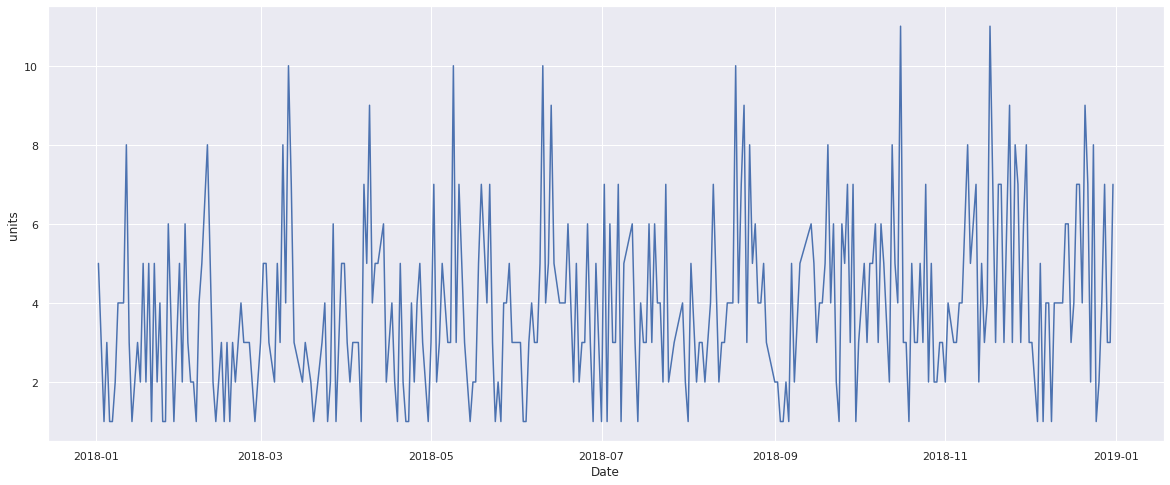

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('units')
plt.plot(AIR_FILTER.units);

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(ts):
  adfuller_result = adfuller(ts, autolag=None)
  adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(adfuller_out)

In [ ]:
adfuller_test(AIR_FILTER.units)

Test Statistic                  -4.369269
p-value                          0.000336
Lags Used                       17.000000
Number of Observations Used    302.000000
dtype: float64


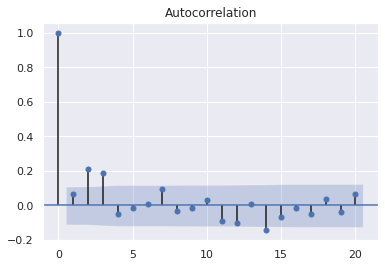

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(AIR_FILTER.units,lags=20)

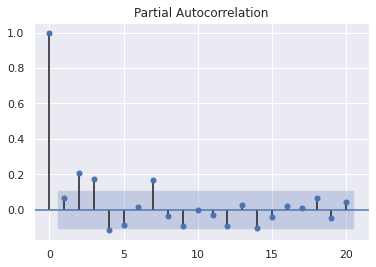

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf_plot = plot_pacf(AIR_FILTER.units,lags=20)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
AIR_FILTER.shape

(320, 1)

In [ ]:
arima = ARIMA(AIR_FILTER.units[0:300].astype(np.int64).to_numpy(), order = (1,0,1))

In [ ]:
arma_model = arima.fit()
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 1320.7420
Dependent Variable: y                Log-Likelihood:      -648.96  
Date:               2021-08-11 13:56 Scale:               1.0000   
No. Observations:   300              Method:              css-mle  
Df Model:           3                Sample:              0        
Df Residuals:       297                                   0        
Converged:          1.0000           S.D. of innovations: 2.105    
No. Iterations:     9.0000           HQIC:                1311.856 
AIC:                1305.9268                                      
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const        3.8169     0.1781   21.4361   0.0000    3.4679    4.1659
ar.L1.y      0.7488     0.1112    6.7322   0.0000    0.5308    0.9668
ma.L1.y     -0.6306     0.1254   -5.0288   0.0000   -0.8763   -0.3848
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.3354             0.0000           1.3354             0.0000
MA.1           1.5859             0.0000           1.5859             0.0000
===================================================================

"""

In [ ]:
forecast_301_319 = arma_model.predict(300, 319) 
forecast_301_319

array([3.58980651, 3.64684319, 3.68955298, 3.72153461, 3.74548285,
       3.76341561, 3.77684388, 3.78689914, 3.79442865, 3.80006684,
       3.80428878, 3.80745023, 3.80981757, 3.81159025, 3.81291767,
       3.81391165, 3.81465596, 3.8152133 , 3.81563065, 3.81594317])

In [ ]:
import numpy as np
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual))* 100, 2 )

In [ ]:
get_mape(AIR_FILTER.units[300:], forecast_301_319 )

49.57

In [ ]:
test_AIR_FILTER=AIR_FILTER.units[300:]
type(test_AIR_FILTER)
test_AIR_FILTER=test_AIR_FILTER.to_frame()

In [ ]:
forecast_301_319

array([3.58980651, 3.64684319, 3.68955298, 3.72153461, 3.74548285,
       3.76341561, 3.77684388, 3.78689914, 3.79442865, 3.80006684,
       3.80428878, 3.80745023, 3.80981757, 3.81159025, 3.81291767,
       3.81391165, 3.81465596, 3.8152133 , 3.81563065, 3.81594317])

In [ ]:
test_AIR_FILTER['forecasting_units']=forecast_301_319

In [ ]:
test_AIR_FILTER

,units,forecasting_units
job_card_date,,
2018-12-12,4,3.589807
2018-12-13,4,3.646843
2018-12-14,6,3.689553
2018-12-15,6,3.721535
2018-12-16,3,3.745483
2018-12-17,4,3.763416
2018-12-18,7,3.776844
2018-12-19,7,3.786899
2018-12-20,4,3.794429


Nearly we need 3 or 4 Air filers for daily in future.

# **7. POLISH**

In [ ]:
POLISH=d_2018[d_2018['invoice_line_text']=='POLISH']

In [ ]:
POLISH

,job_card_date,invoice_line_text,units,year,month
3963,2018-01-02,POLISH,2,2018,1
3980,2018-01-03,POLISH,5,2018,1
3993,2018-01-04,POLISH,2,2018,1
4016,2018-01-05,POLISH,2,2018,1
4029,2018-01-06,POLISH,3,2018,1
...,...,...,...,...,...
12402,2018-12-27,POLISH,6,2018,12
12430,2018-12-28,POLISH,7,2018,12
12450,2018-12-29,POLISH,4,2018,12
12466,2018-12-30,POLISH,1,2018,12


In [ ]:
POLISH=POLISH.drop(['invoice_line_text', 'year','month'], axis = 1)

In [ ]:
POLISH

,job_card_date,units
3963,2018-01-02,2
3980,2018-01-03,5
3993,2018-01-04,2
4016,2018-01-05,2
4029,2018-01-06,3
...,...,...
12402,2018-12-27,6
12430,2018-12-28,7
12450,2018-12-29,4
12466,2018-12-30,1


In [ ]:
POLISH.set_index(pd.to_datetime(POLISH.job_card_date),inplace=True)
POLISH.drop('job_card_date', axis = 1, inplace = True)
POLISH[-5:]

,units
job_card_date,
2018-12-27,6
2018-12-28,7
2018-12-29,4
2018-12-30,1
2018-12-31,4


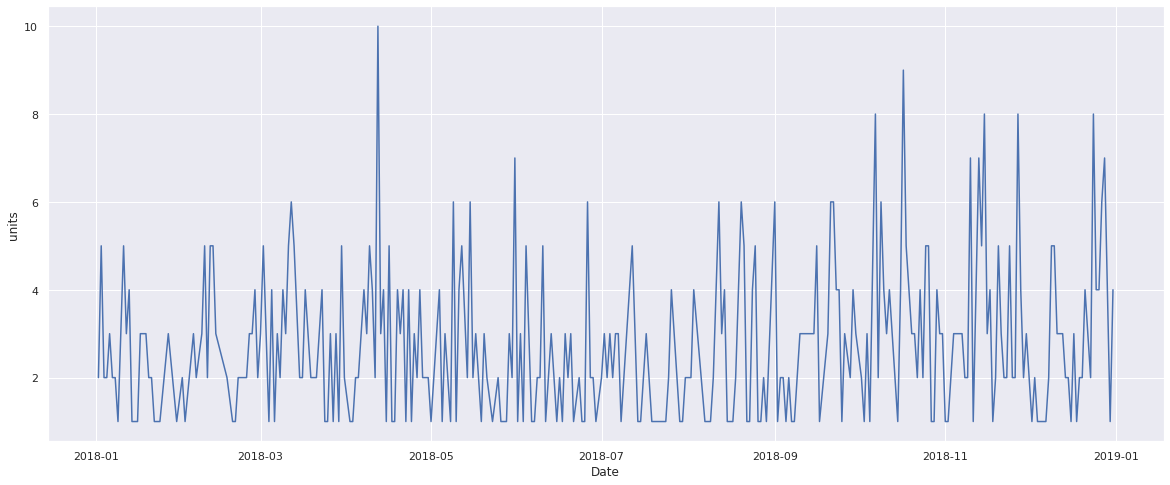

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('units')
plt.plot(POLISH.units);

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(ts):
  adfuller_result = adfuller(ts, autolag=None)
  adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(adfuller_out)

In [ ]:
adfuller_test(POLISH.units)

Test Statistic                  -3.319020
p-value                          0.014049
Lags Used                       16.000000
Number of Observations Used    286.000000
dtype: float64


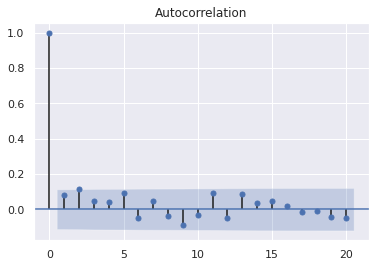

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(POLISH.units,lags=20)

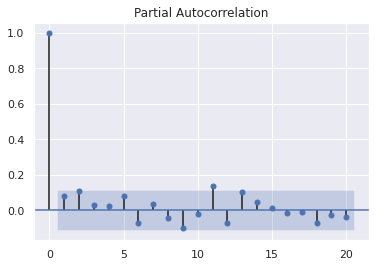

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf_plot = plot_pacf(POLISH.units,lags=20)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
POLISH.shape

(303, 1)

In [ ]:
arima = ARIMA(POLISH.units[0:280].astype(np.int64).to_numpy(), order = (2,0,1))

In [ ]:
arma_model = arima.fit()
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 1109.3920
Dependent Variable: y                Log-Likelihood:      -540.61  
Date:               2021-08-11 13:56 Scale:               1.0000   
No. Observations:   280              Method:              css-mle  
Df Model:           4                Sample:              0        
Df Residuals:       276                                   0        
Converged:          1.0000           S.D. of innovations: 1.668    
No. Iterations:     15.0000          HQIC:                1098.508 
AIC:                1091.2180                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const         2.6901     0.1292   20.8204   0.0000    2.4369   2.9433
ar.L1.y       0.5556     0.4407    1.2607   0.2085   -0.3082   1.4195
ar.L2.y       0.0714     0.0792    0.9010   0.3684   -0.0839   0.2267
ma.L1.y      -0.5155     0.4407   -1.1697   0.2431   -1.3793   0.3483
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.5077             0.0000           1.5077             0.0000
AR.2          -9.2918             0.0000           9.2918             0.5000
MA.1           1.9398             0.0000           1.9398             0.0000
===================================================================

"""

In [ ]:
forecast_280_302 = arma_model.predict(280, 302) 
forecast_280_302

array([2.36884328, 2.4623324 , 2.54060755, 2.59077397, 2.62423598,
       2.64640986, 2.66111919, 2.67087513, 2.67734592, 2.68163776,
       2.68448439, 2.68637245, 2.68762474, 2.68845534, 2.68900624,
       2.68937164, 2.68961399, 2.68977474, 2.68988135, 2.68995207,
       2.68999897, 2.69003008, 2.69005071])

In [ ]:
import numpy as np
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual))* 100, 2 )

In [ ]:
get_mape(POLISH.units[280:], forecast_280_302)

51.55

In [ ]:
test_POLISH=POLISH.units[280:]
type(test_POLISH)
test_POLISH=test_POLISH.to_frame()

In [ ]:
forecast_280_302

array([2.36884328, 2.4623324 , 2.54060755, 2.59077397, 2.62423598,
       2.64640986, 2.66111919, 2.67087513, 2.67734592, 2.68163776,
       2.68448439, 2.68637245, 2.68762474, 2.68845534, 2.68900624,
       2.68937164, 2.68961399, 2.68977474, 2.68988135, 2.68995207,
       2.68999897, 2.69003008, 2.69005071])

In [ ]:
test_POLISH['forecasting_units']=forecast_280_302

In [ ]:
test_POLISH

,units,forecasting_units
job_card_date,,
2018-12-09,5,2.368843
2018-12-10,5,2.462332
2018-12-11,3,2.540608
2018-12-12,3,2.590774
2018-12-13,3,2.624236
2018-12-14,2,2.646410
2018-12-15,2,2.661119
2018-12-16,1,2.670875
2018-12-17,3,2.677346


Nearly we need  2 or 3 Polish for daily in future.

# **8. BRAKE_SHOE**

In [ ]:
BRAKE_SHOE=d_2018[d_2018['invoice_line_text']=='BRAKE SHOE']

In [ ]:
BRAKE_SHOE

,job_card_date,invoice_line_text,units,year,month
3948,2018-01-02,BRAKE SHOE,4,2018,1
3967,2018-01-03,BRAKE SHOE,1,2018,1
3987,2018-01-04,BRAKE SHOE,1,2018,1
3999,2018-01-05,BRAKE SHOE,3,2018,1
4021,2018-01-06,BRAKE SHOE,2,2018,1
...,...,...,...,...,...
12265,2018-12-22,BRAKE SHOE,5,2018,12
12312,2018-12-24,BRAKE SHOE,1,2018,12
12379,2018-12-27,BRAKE SHOE,2,2018,12
12407,2018-12-28,BRAKE SHOE,1,2018,12


In [ ]:
BRAKE_SHOE=BRAKE_SHOE.drop(['invoice_line_text', 'year','month'], axis = 1)

In [ ]:
BRAKE_SHOE

,job_card_date,units
3948,2018-01-02,4
3967,2018-01-03,1
3987,2018-01-04,1
3999,2018-01-05,3
4021,2018-01-06,2
...,...,...
12265,2018-12-22,5
12312,2018-12-24,1
12379,2018-12-27,2
12407,2018-12-28,1


In [ ]:
BRAKE_SHOE.set_index(pd.to_datetime(BRAKE_SHOE.job_card_date),inplace=True)
BRAKE_SHOE.drop('job_card_date', axis = 1, inplace = True)
BRAKE_SHOE[-5:]

,units
job_card_date,
2018-12-22,5
2018-12-24,1
2018-12-27,2
2018-12-28,1
2018-12-31,1


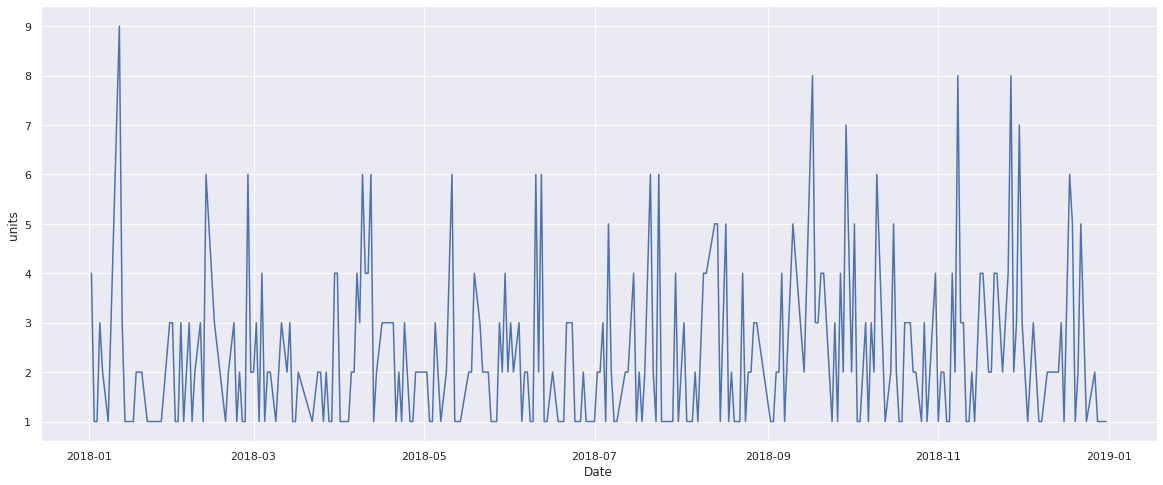

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('units')
plt.plot(BRAKE_SHOE.units);

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(ts):
  adfuller_result = adfuller(ts, autolag=None)
  adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(adfuller_out)

In [ ]:
adfuller_test(BRAKE_SHOE.units)

Test Statistic                  -3.898003
p-value                          0.002050
Lags Used                       16.000000
Number of Observations Used    266.000000
dtype: float64


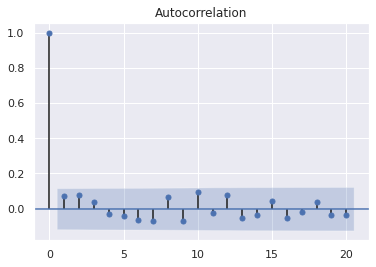

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(BRAKE_SHOE.units,lags=20)

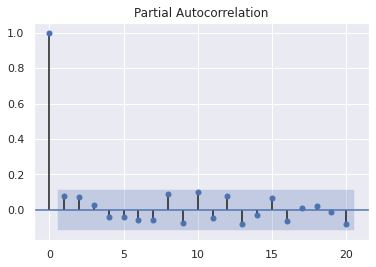

In [ ]:
pacf_plot = plot_pacf(BRAKE_SHOE.units,lags=20)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
BRAKE_SHOE.shape

(283, 1)

In [ ]:
arima = ARIMA(BRAKE_SHOE.units[0:250].astype(np.int64).to_numpy(), order = (2,0,1))

In [ ]:
arma_model = arima.fit()
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 944.4699
Dependent Variable: y                Log-Likelihood:      -458.43 
Date:               2021-08-11 13:56 Scale:               1.0000  
No. Observations:   250              Method:              css-mle 
Df Model:           4                Sample:              0       
Df Residuals:       246                                   0       
Converged:          1.0000           S.D. of innovations: 1.514   
No. Iterations:     12.0000          HQIC:                933.949 
AIC:                926.8626                                      
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        2.3151     0.1137   20.3548   0.0000    2.0922   2.5380
ar.L1.y     -0.1515     0.3256   -0.4654   0.6421   -0.7897   0.4866
ar.L2.y      0.1318     0.0641    2.0564   0.0408    0.0062   0.2574
ma.L1.y      0.2126     0.3251    0.6540   0.5137   -0.4246   0.8499
--------------------------------------------------------------------------
                 Real          Imaginary         Modulus         Frequency
--------------------------------------------------------------------------
AR.1           -2.2389            0.0000          2.2389            0.5000
AR.2            3.3885            0.0000          3.3885            0.0000
MA.1           -4.7027            0.0000          4.7027            0.5000
==================================================================

"""

In [ ]:
forecast_250_282 = arma_model.predict(250, 282) 
forecast_250_282

array([2.05819725, 2.18070268, 2.30162208, 2.29944671, 2.31571493,
       2.31296305, 2.31552439, 2.31477354, 2.31522493, 2.31505756,
       2.31514242, 2.3151075 , 2.31512398, 2.31511688, 2.31512013,
       2.3151187 , 2.31511934, 2.31511906, 2.31511918, 2.31511913,
       2.31511915, 2.31511914, 2.31511915, 2.31511914, 2.31511915,
       2.31511915, 2.31511915, 2.31511915, 2.31511915, 2.31511915,
       2.31511915, 2.31511915, 2.31511915])

In [ ]:
import numpy as np
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual))* 100, 2 )

In [ ]:
get_mape(BRAKE_SHOE.units[250:], forecast_250_282)

58.31

In [ ]:
test_BRAKE_SHOE=BRAKE_SHOE.units[250:]
type(test_BRAKE_SHOE)
test_BRAKE_SHOE=test_BRAKE_SHOE.to_frame()

In [ ]:
forecast_250_282

array([2.05819725, 2.18070268, 2.30162208, 2.29944671, 2.31571493,
       2.31296305, 2.31552439, 2.31477354, 2.31522493, 2.31505756,
       2.31514242, 2.3151075 , 2.31512398, 2.31511688, 2.31512013,
       2.3151187 , 2.31511934, 2.31511906, 2.31511918, 2.31511913,
       2.31511915, 2.31511914, 2.31511915, 2.31511914, 2.31511915,
       2.31511915, 2.31511915, 2.31511915, 2.31511915, 2.31511915,
       2.31511915, 2.31511915, 2.31511915])

In [ ]:
test_BRAKE_SHOE['forecasting_units']=forecast_250_282

In [ ]:
test_BRAKE_SHOE

,units,forecasting_units
job_card_date,,
2018-11-13,2,2.058197
2018-11-14,1,2.180703
2018-11-16,4,2.301622
2018-11-17,4,2.299447
2018-11-19,2,2.315715
2018-11-20,2,2.312963
2018-11-21,4,2.315524
2018-11-22,4,2.314774
2018-11-24,2,2.315225


Nearly we need 2 or 3 BRAKE_SHOE for daily in Future.

# **9. OIL FILTER**

In [ ]:
OIL_FILTER=d_2018[d_2018['invoice_line_text']=='OIL FILTER']

In [ ]:
OIL_FILTER

,job_card_date,invoice_line_text,units,year,month
3961,2018-01-02,OIL FILTER,2,2018,1
3979,2018-01-03,OIL FILTER,4,2018,1
3992,2018-01-04,OIL FILTER,2,2018,1
4014,2018-01-05,OIL FILTER,1,2018,1
4028,2018-01-06,OIL FILTER,1,2018,1
...,...,...,...,...,...
12370,2018-12-26,OIL FILTER,4,2018,12
12401,2018-12-27,OIL FILTER,2,2018,12
12429,2018-12-28,OIL FILTER,4,2018,12
12449,2018-12-29,OIL FILTER,1,2018,12


In [ ]:
OIL_FILTER=OIL_FILTER.drop(['invoice_line_text', 'year','month'], axis = 1)

In [ ]:
OIL_FILTER

,job_card_date,units
3961,2018-01-02,2
3979,2018-01-03,4
3992,2018-01-04,2
4014,2018-01-05,1
4028,2018-01-06,1
...,...,...
12370,2018-12-26,4
12401,2018-12-27,2
12429,2018-12-28,4
12449,2018-12-29,1


In [ ]:
OIL_FILTER.set_index(pd.to_datetime(OIL_FILTER.job_card_date),inplace=True)
OIL_FILTER.drop('job_card_date', axis = 1, inplace = True)
OIL_FILTER[-5:]

,units
job_card_date,
2018-12-26,4
2018-12-27,2
2018-12-28,4
2018-12-29,1
2018-12-31,4


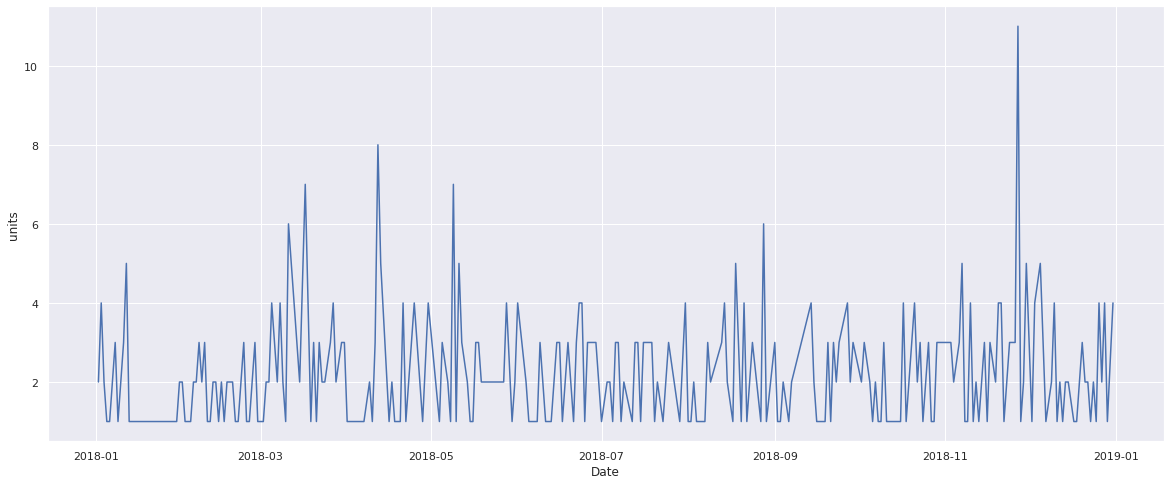

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('units')
plt.plot(OIL_FILTER.units);

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(ts):
  adfuller_result = adfuller(ts, autolag=None)
  adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(adfuller_out)

In [ ]:
adfuller_test(OIL_FILTER.units) 

Test Statistic                  -4.307013
p-value                          0.000432
Lags Used                       16.000000
Number of Observations Used    258.000000
dtype: float64


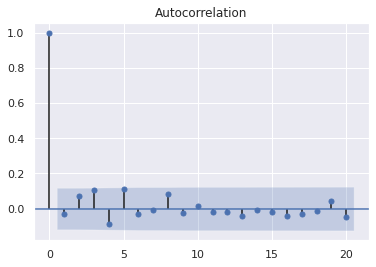

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(OIL_FILTER.units,lags=20)

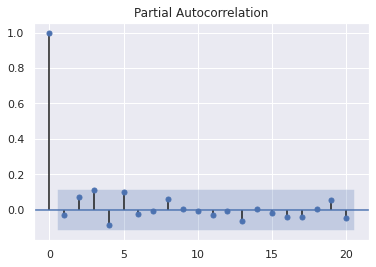

In [ ]:
pacf_plot = plot_pacf(OIL_FILTER.units,lags=20)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
OIL_FILTER.shape

(275, 1)

In [ ]:
arima = ARIMA(OIL_FILTER.units[0:250].astype(np.int64).to_numpy(), order = (2,0,1))

arma_model = arima.fit()
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 903.3262
Dependent Variable: y                Log-Likelihood:      -437.86 
Date:               2021-08-11 13:56 Scale:               1.0000  
No. Observations:   250              Method:              css-mle 
Df Model:           4                Sample:              0       
Df Residuals:       246                                   0       
Converged:          1.0000           S.D. of innovations: 1.394   
No. Iterations:     15.0000          HQIC:                892.805 
AIC:                885.7189                                      
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        2.2317     0.1024   21.7843   0.0000    2.0310   2.4325
ar.L1.y      0.5124     0.4864    1.0535   0.2932   -0.4409   1.4658
ar.L2.y      0.0831     0.0661    1.2565   0.2101   -0.0465   0.2126
ma.L1.y     -0.5299     0.4848   -1.0931   0.2754   -1.4802   0.4203
--------------------------------------------------------------------------
                 Real          Imaginary         Modulus         Frequency
--------------------------------------------------------------------------
AR.1            1.5581            0.0000          1.5581            0.0000
AR.2           -7.7276            0.0000          7.7276            0.5000
MA.1            1.8870            0.0000          1.8870            0.0000
==================================================================

"""

In [ ]:
forecast_250_274 = arma_model.predict(250, 274) 
forecast_250_274

array([2.31213127, 2.50285862, 2.37734616, 2.32887252, 2.29360919,
       2.27151361, 2.25726262, 2.24812498, 2.24225907, 2.23849433,
       2.23607802, 2.23452717, 2.2335318 , 2.23289295, 2.23248291,
       2.23221975, 2.23205084, 2.23194243, 2.23187285, 2.23182819,
       2.23179953, 2.23178114, 2.23176933, 2.23176175, 2.23175689])

In [ ]:
import numpy as np
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual))* 100, 2 )

In [ ]:
get_mape(OIL_FILTER.units[250:], forecast_250_274 )

61.22

In [ ]:
test_OIL_FILTER=OIL_FILTER.units[250:]
type(test_OIL_FILTER)
test_OIL_FILTER=test_OIL_FILTER.to_frame()

In [ ]:
test_OIL_FILTER['forecasting_units']=forecast_250_274

In [ ]:
test_OIL_FILTER

,units,forecasting_units
job_card_date,,
2018-12-02,1,2.312131
2018-12-03,4,2.502859
2018-12-05,5,2.377346
2018-12-07,1,2.328873
2018-12-09,2,2.293609
2018-12-10,4,2.271514
2018-12-11,1,2.257263
2018-12-12,2,2.248125
2018-12-13,1,2.242259


Nearly we need 2 or 3 OIL FILTER for daily in Future.

# **10. DISC_OIL**

In [ ]:
DISC_OIL=d_2018[d_2018['invoice_line_text']=='DISC OIL']

In [ ]:
DISC_OIL

,job_card_date,invoice_line_text,units,year,month
3975,2018-01-03,DISC OIL,1,2018,1
4005,2018-01-05,DISC OIL,6,2018,1
4036,2018-01-07,DISC OIL,1,2018,1
4046,2018-01-08,DISC OIL,1,2018,1
4069,2018-01-09,DISC OIL,4,2018,1
...,...,...,...,...,...
12388,2018-12-27,DISC OIL,2,2018,12
12416,2018-12-28,DISC OIL,2,2018,12
12442,2018-12-29,DISC OIL,2,2018,12
12460,2018-12-30,DISC OIL,2,2018,12


In [ ]:
DISC_OIL=DISC_OIL.drop(['invoice_line_text', 'year','month'], axis = 1)

In [ ]:
DISC_OIL

,job_card_date,units
3975,2018-01-03,1
4005,2018-01-05,6
4036,2018-01-07,1
4046,2018-01-08,1
4069,2018-01-09,4
...,...,...
12388,2018-12-27,2
12416,2018-12-28,2
12442,2018-12-29,2
12460,2018-12-30,2


In [ ]:
DISC_OIL.set_index(pd.to_datetime(DISC_OIL.job_card_date),inplace=True)
DISC_OIL.drop('job_card_date', axis = 1, inplace = True)
DISC_OIL[-5:]

,units
job_card_date,
2018-12-27,2
2018-12-28,2
2018-12-29,2
2018-12-30,2
2018-12-31,3


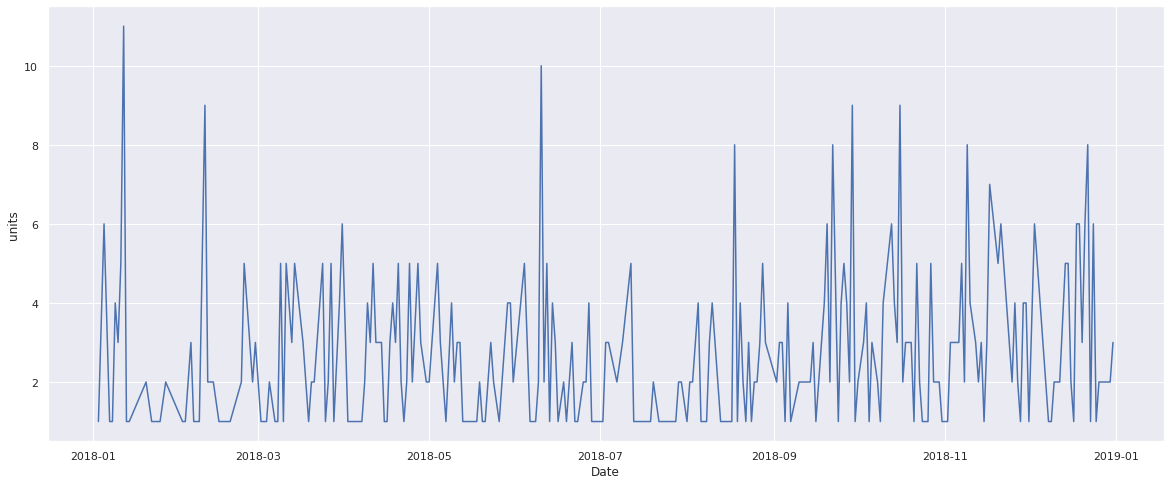

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('units')
plt.plot(DISC_OIL.units);

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(ts):
  adfuller_result = adfuller(ts, autolag=None)
  adfuller_out = pd.Series(adfuller_result[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(adfuller_out)

In [ ]:
adfuller_test(DISC_OIL.units) 

Test Statistic                  -3.155485
p-value                          0.022710
Lags Used                       16.000000
Number of Observations Used    249.000000
dtype: float64


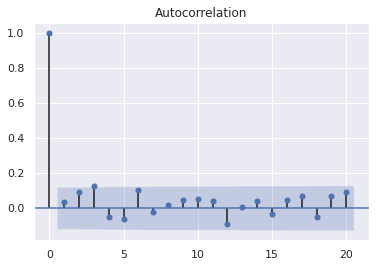

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(DISC_OIL.units,lags=20)

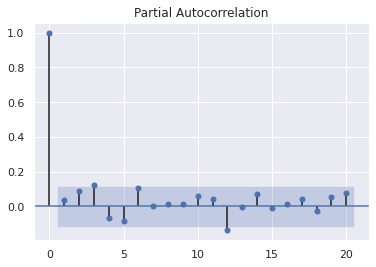

In [ ]:
pacf_plot = plot_pacf(DISC_OIL.units,lags=20)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
DISC_OIL.shape

(266, 1)

In [ ]:
arima = ARIMA(DISC_OIL.units[0:230].astype(np.int64).to_numpy(), order = (2,0,1))

arma_model = arima.fit()
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 956.2913
Dependent Variable: y                Log-Likelihood:      -464.55 
Date:               2021-08-11 13:56 Scale:               1.0000  
No. Observations:   230              Method:              css-mle 
Df Model:           4                Sample:              0       
Df Residuals:       226                                   0       
Converged:          1.0000           S.D. of innovations: 1.824   
No. Iterations:     13.0000          HQIC:                946.035 
AIC:                939.1009                                      
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        2.5784     0.1413   18.2526   0.0000    2.3016   2.8553
ar.L1.y      0.3494     0.3571    0.9786   0.3288   -0.3504   1.0493
ar.L2.y      0.1023     0.0674    1.5177   0.1305   -0.0298   0.2344
ma.L1.y     -0.3546     0.3550   -0.9989   0.3189   -1.0505   0.3412
--------------------------------------------------------------------------
                 Real          Imaginary         Modulus         Frequency
--------------------------------------------------------------------------
AR.1            1.8546            0.0000          1.8546            0.0000
AR.2           -5.2700            0.0000          5.2700            0.5000
MA.1            2.8198            0.0000          2.8198            0.0000
==================================================================

"""

In [ ]:
forecast_231_265 = arma_model.predict(230, 265) 
forecast_231_265

array([2.43263419, 2.57061591, 2.56078309, 2.57146473, 2.57419138,
       2.5762371 , 2.57723096, 2.57778757, 2.57808377, 2.57824422,
       2.5783306 , 2.5783772 , 2.57840232, 2.57841587, 2.57842318,
       2.57842712, 2.57842924, 2.57843038, 2.578431  , 2.57843133,
       2.57843151, 2.57843161, 2.57843166, 2.57843169, 2.57843171,
       2.57843171, 2.57843172, 2.57843172, 2.57843172, 2.57843172,
       2.57843172, 2.57843172, 2.57843172, 2.57843172, 2.57843172,
       2.57843172])

In [ ]:
import numpy as np
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual))* 100, 2 )

In [ ]:
get_mape(DISC_OIL.units[230:], forecast_231_265 )

61.9

In [ ]:
test_DISC_OIL=DISC_OIL.units[230:]
type(test_DISC_OIL)
test_DISC_OIL=test_DISC_OIL.to_frame()

In [ ]:
test_DISC_OIL

,units
job_card_date,
2018-11-17,7
2018-11-20,5
2018-11-21,6
2018-11-24,3
2018-11-25,2
2018-11-26,4
2018-11-27,2
2018-11-28,1
2018-11-29,4


In [ ]:
test_DISC_OIL['forecasting_units']=forecast_231_265

In [ ]:
test_DISC_OIL

,units,forecasting_units
job_card_date,,
2018-11-17,7,2.432634
2018-11-20,5,2.570616
2018-11-21,6,2.560783
2018-11-24,3,2.571465
2018-11-25,2,2.574191
2018-11-26,4,2.576237
2018-11-27,2,2.577231
2018-11-28,1,2.577788
2018-11-29,4,2.578084


Nearly we need 2 or 3 DISC_OIL for daily in future.

# **Conculsion**:

For the given data, we bulid an 'Auto regressive Moving average' (ARMA) Time Series  Model  for the forecasting of Top Demanded spare parts. Intially we selected Top 10 deamanding inventories (or) products from the past one year day-wise data for  the future inventory forecasting. The all selected inventories are in stationary nature, that's why we selected Auto regressive Moving average model for the forecasting.

In the below, we are presenting the Forecasting units of the Top 10 products for the planning of future **Stock**(inventories). They are:

1. **Engine Oils:** Nearly we need minimum 7 or 8 Engine Oils for daily. It mean that yearly we required 2,555 units for our future inventory.
2. **CHAIN_LUBRICATION:** Nearly we nedd 6 or 7 items of CHAIN_LUBRICATION for single day. It mean that yearly we required 2,190 units for our future inventory.
3. **GENERAL SERVICE:** Nearly, we get 4 GENERAL SERVICE in each day in future.It mean that yearly we required 1,460 units for our future inventory.
4. **3M OILS:** Nearly we need minimum 3 or 4 3M OILS in future. It mean that yearly we required 1,095 units for our future inventory.
5. **Consumables:** Nearly we need 3 or 4 Consumables daily in future. It mean that yearly we required 1,095 units for our future inventory.
6. **AIR FILTER**: Nearly we need 3 or 4 Air filers for daily in future.
It mean that yearly we required 1,095 units for our future inventory.
7. **POLISH**: Nearly we need  2 or 3 Polishs for daily in future.
It mean that yearly we required 730 units for our future inventory.
8. **BRAKE_SHOE:** Nearly we need 2 or 3 BRAKE_SHOE for daily in Future.
It mean that yearly we required 730 units for our future inventory.
9. **OIL FILTER:** Nearly we need 2 or 3 OIL FILTER for daily in Future.
10. **DISC OIL:** Nearly we need 2 or 3 DISC_OIL for daily in future.
It mean that yearly we required 730 units for our future inventory.

With the help above forecasted inventory units we will definitely achieve Just In Time Standards.
